# OV7675 Image Viewer
Takes the hexadecimal output of the Camera Test from the Serial Monitor and converts and displays it as an image.

In [2]:
# Import the needed libraries
from matplotlib import pyplot as plt
import numpy as np
import struct

Update the following variable with the output of your Serial Monitor.

In [11]:
# Copy the output of the Serial Monitor to the variable below
# should be 25344
HEXADECIMAL_BYTES = [
0xFABE, 0x1AC7, 0x1BC7, 0x1BC7, 0x3BC7, 0x5CCF, 0x5CCF, 0x7CCF, 0x9DCF, 0x9DD7, 0x9DD7, 0x9DD7, 0x9ED7, 0x9ED7, 0x9ED7, 0x9ED7, 0x9EDF, 0x9ED7, 0x9ED7, 0x9ED7, 0x9ED7, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EDF, 0x9EDF, 0x9EE7, 0x9EE7, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x3ECF, 0x388D, 0x97A5, 0x76A5, 0x95B5, 0x59CE, 0x39CE, 0x7ADE, 0x7BDE, 0x5BDE, 0x5BDE, 0x3AD6, 0x1AD6, 0x3AD6, 0x3AD6, 0x19D6, 0xB9CD, 0xB7CD, 0x97C5, 0x77C5, 0x56C5, 0x36BD, 0xD4B4, 0x94B4, 0x12A4, 0xF1A3, 0x12AC, 0x12AC, 0xD1AB, 0x92A3, 0xB082, 0x2E93, 0x10A4, 0xF19B, 0x6F8B, 0x508B, 0x8D6A, 0xAC72, 0x8C62, 0xAB62, 0x952, 0xE849, 0x2631, 0xE630, 0xE530, 0xE430, 0xE430, 0x2439, 0x8641, 0xC649, 0xC749, 0xA649, 0x8751, 0x8751, 0xA751, 0xC759, 0xE759, 0x85A, 0x85A, 0xE859, 0xE851, 0xC751, 0xC751, 0xC749, 0xC651, 0xC751, 0xC749, 0xC751, 0xE749, 0xE749, 0xE749, 0xA641, 0x8639, 0xA641, 0xA641, 0xA641, 0x8639, 0xA639, 0xFABE, 0x1BC7, 0x1BC7, 0x3BC7, 0x5BC7, 0x5CC7, 0x7BCF, 0x9DCF, 0x9DCF, 0x9DCF, 0x9DD7, 0x9DD7, 0x9DD7, 0x9DD7, 0x9ED7, 0x9EDF, 0x9EDF, 0x9EDF, 0x9ED7, 0x9ED7, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EDF, 0x9EDF, 0x9EE7, 0x9EE7, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x1ECF, 0x5795, 0x97A5, 0x579D, 0x95B5, 0x59D6, 0x59D6, 0x7ADE, 0x7ADE, 0x7BDE, 0x7ADE, 0x5ADE, 0x3ADE, 0x1ADE, 0x19DE, 0x19DE, 0xD8D5, 0x97CD, 0x97CD, 0x77C5, 0x36C5, 0xF6BC, 0xD4B4, 0x94B4, 0x12A4, 0x11AC, 0x52B4, 0x13AC, 0xD1AB, 0xF1AB, 0x509B, 0x6F9B, 0xF39B, 0xD29B, 0x4F8B, 0x508B, 0x6D6A, 0x8C6A, 0xEC72, 0xEB72, 0xCA49, 0xC749, 0x8741, 0xA741, 0x4639, 0x2539, 0x2539, 0x4539, 0x8641, 0xC649, 0xC651, 0xC751, 0xA749, 0xA751, 0xA751, 0xC859, 0xE859, 0xE859, 0x85A, 0x85A, 0xE851, 0xE751, 0xA749, 0xA649, 0xC749, 0xC749, 0xE749, 0xE749, 0xE749, 0xE749, 0xE749, 0xC641, 0x8641, 0xA641, 0xA641, 0xA641, 0xC641, 0xA639, 0x1BC7, 0x1BC7, 0x1BC7, 0x3BC7, 0x3CC7, 0x1CBF, 0x7BCF, 0x9DCF, 0x9DCF, 0x9DD7, 0x9DD7, 0x9DD7, 0x9DD7, 0x9DD7, 0x9ED7, 0x9ED7, 0x9ED7, 0x9ED7, 0x9ED7, 0x9ED7, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EDF, 0x9EDF, 0x9EE7, 0x9EE7, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0xDECE, 0x789D, 0xB7AD, 0x57A5, 0x95B5, 0x39CE, 0x5ADE, 0x7ADE, 0x7ADE, 0x7BDE, 0x5BDE, 0x5AD6, 0x3BDE, 0x3AD6, 0x19D6, 0x19DE, 0xB9D5, 0xB8CD, 0x98CD, 0x77CD, 0x56C5, 0xD5BC, 0xB4B4, 0x73B4, 0xD2A3, 0x12AC, 0x73B4, 0x53B4, 0x32AC, 0x13A4, 0xB29B, 0xF1A3, 0x52A4, 0x329C, 0x908B, 0x718B, 0x4D6A, 0x6B6A, 0xAC6A, 0xC7B, 0x2B5A, 0x84A, 0x8841, 0x8741, 0x6741, 0x4641, 0x6641, 0x6541, 0x8649, 0xC751, 0xC751, 0xC751, 0xC751, 0xC751, 0xA751, 0xC751, 0xE859, 0xE859, 0xE859, 0x85A, 0x852, 0xE751, 0xE751, 0xC751, 0xC749, 0xC749, 0xE749, 0xE749, 0xE749, 0xE741, 0xC741, 0xC641, 0x8641, 0xA641, 0xA641, 0xC641, 0xC641, 0xE741, 0x1AC7, 0x1BC7, 0x1BC7, 0x5BC7, 0x5CC7, 0x5BC7, 0x9CD7, 0x9ECF, 0x9DCF, 0x9DD7, 0x9DCF, 0x9DCF, 0x9DD7, 0x9DD7, 0x9ED7, 0x9EDF, 0x9EDF, 0x9EDF, 0x9ED7, 0x9ED7, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EDF, 0x9EDF, 0x9EE7, 0x9EEF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x3ED7, 0x19AE, 0xD8AD, 0x59A5, 0x76AD, 0x58D6, 0x5ADE, 0x7ADE, 0x7BDE, 0x7BDE, 0x5BDE, 0x5BDE, 0x3ADE, 0x1AD6, 0xF9D5, 0x19DE, 0xD9D5, 0xB8D5, 0x98CD, 0x77CD, 0x36C5, 0xF5BC, 0xD4B4, 0x53AC, 0x52AC, 0x91B4, 0x74B4, 0x93BC, 0x72B4, 0x73B4, 0x72AC, 0x73A4, 0x329C, 0x329C, 0xD093, 0x918B, 0x8D72, 0x8C72, 0xAC72, 0xEC7A, 0x4B5A, 0xE951, 0xA841, 0x8749, 0xA749, 0x8649, 0x8649, 0xA651, 0x8649, 0xC751, 0xC751, 0xC751, 0xC851, 0xA751, 0xC759, 0xC751, 0xC859, 0xE859, 0x85A, 0x85A, 0xE851, 0xE751, 0xE751, 0xC749, 0xC749, 0xC749, 0xE749, 0xE749, 0xC749, 0xC741, 0xC741, 0xC641, 0xA641, 0xA641, 0xA641, 0xC641, 0xC641, 0xC641, 0x1AC7, 0x1BC7, 0x3BC7, 0x5BC7, 0x5CC7, 0x9CCF, 0x9DD7, 0x9ECF, 0x9DCF, 0x9DD7, 0x9DCF, 0x9DD7, 0x9DD7, 0x9ED7, 0x9ED7, 0x9ED7, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9ED7, 0x9ED7, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EDF, 0x9EDF, 0x9EE7, 0x9EEF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x1ECF, 0x39AE, 0x18AE, 0x79A5, 0x76AD, 0x38D6, 0x7ADE, 0x7ADE, 0x7ADE, 0x5BDE, 0x7BDE, 0x5BDE, 0x5BDE, 0x1BD6, 0xFAD5, 0xF9D5, 0xD9D5, 0xB8D5, 0xB8CD, 0x98CD, 0x36C5, 0xD5B4, 0xD4BC, 0x33AC, 0x32A4, 0xB2B4, 0xD4BC, 0x75B4, 0x53AC, 0x53AC, 0x93AC, 0xB3AC, 0x729C, 0x1294, 0xD193, 0x718B, 0xAE72, 0xCC72, 0xED7A, 0xCD72, 0x2B5A, 0xE849, 0xE849, 0xE849, 0xC749, 0xC749, 0xA749, 0xA649, 0xC751, 0x752, 0x85A, 0x852, 0xE851, 0xA751, 0xC851, 0xC851, 0xC759, 0xE859, 0xE859, 0x85A, 0xE851, 0xE751, 0xE751, 0xC751, 0xA749, 0xC749, 0xC749, 0xC749, 0xC749, 0xC749, 0xC741, 0xC641, 0xA641, 0x8639, 0xC641, 0xC641, 0xE741, 0xC741, 0x1AC7, 0x3BC7, 0x3BC7, 0x5BCF, 0x7CCF, 0x9BD7, 0x9DD7, 0x9ED7, 0x9DD7, 0x9DD7, 0x9DD7, 0x9DD7, 0x9DD7, 0x9ED7, 0x9ED7, 0x9EDF, 0x9EDF, 0x9EDF, 0x9ED7, 0x9ECF, 0x9ED7, 0x9ED7, 0x9ED7, 0x9EDF, 0x9EDF, 0x9EDF, 0x9ED7, 0x9ED7, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EDF, 0x9EDF, 0x9EE7, 0x9EEF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x3ED7, 0x19AE, 0xD8AD, 0x79A5, 0x76AD, 0x58D6, 0x5ADE, 0x7ADE, 0x7ADE, 0x5BDE, 0x5BD6, 0x5BDE, 0x3BDE, 0x1ADE, 0xF9D5, 0xF9DD, 0xF9D5, 0xB8D5, 0xB8CD, 0x97CD, 0x37C5, 0xD5B4, 0xB4B4, 0x33AC, 0xF2A3, 0xD2BC, 0xD5BC, 0x54B4, 0x53AC, 0x53AC, 0x93AC, 0xB3A4, 0x729C, 0x1194, 0xF18B, 0x7183, 0xE7B, 0xED7A, 0x2D7B, 0x2E73, 0x8C62, 0x952, 0xE851, 0xE749, 0xE749, 0xE749, 0xC749, 0xC751, 0xC751, 0x752, 0x2852, 0x852, 0xE851, 0xC751, 0xC859, 0xE759, 0xE859, 0xE859, 0xE859, 0xE859, 0xE851, 0xE751, 0xC751, 0xC751, 0xA749, 0xA749, 0xA749, 0xC749, 0xC749, 0xC741, 0xC749, 0xA649, 0x8641, 0xC641, 0xC741, 0xE741, 0xE749, 0x74A, 0x1AC7, 0x1BC7, 0x3BC7, 0x5BCF, 0x5CC7, 0x9CD7, 0x9ED7, 0x9ED7, 0x9ED7, 0x9ED7, 0x9ED7, 0x9ED7, 0x9ED7, 0x9ED7, 0x9ED7, 0x9ED7, 0x9EDF, 0x9EDF, 0x9ED7, 0x9ED7, 0x7DCF, 0x9DD7, 0x9ED7, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9ED7, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EDF, 0x9EDF, 0x9EE7, 0x9EEF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x3ED7, 0xD9A5, 0x97A5, 0x189D, 0x56AD, 0x58D6, 0x5ADE, 0x7ADE, 0x7BDE, 0x5BDE, 0x3ADE, 0x3ADE, 0x3ADE, 0x3AD6, 0x3ADE, 0xFAD5, 0xD9D5, 0xB8D5, 0xB8D5, 0xB8D5, 0x37C5, 0xD5B4, 0x94B4, 0x33AC, 0x52B4, 0x14C5, 0xD5BC, 0xB5B4, 0xB4B4, 0xB4B4, 0x94AC, 0x93A4, 0x729C, 0x1194, 0x1194, 0x7083, 0xE7B, 0xED7A, 0x2E7B, 0xD73, 0x6C62, 0x295A, 0xE851, 0xE849, 0xE749, 0xC749, 0xC749, 0xC751, 0xC751, 0x275A, 0x85A, 0x85A, 0x852, 0xC751, 0xE751, 0xE759, 0xE759, 0xE759, 0xE859, 0xE859, 0xE851, 0x752, 0xC751, 0xC751, 0xA749, 0xA649, 0xA749, 0xA749, 0xA749, 0xC641, 0xC649, 0xA641, 0xE749, 0x74A, 0xE741, 0xE741, 0xE741, 0x742, 0x1ABF, 0x1BC7, 0x3BC7, 0x3BC7, 0x3BC7, 0x9BD7, 0x9EDF, 0x9ED7, 0x9ED7, 0x9DD7, 0x9ED7, 0x9ED7, 0x9ED7, 0x9ED7, 0x9ED7, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9ED7, 0x9DCF, 0x9DD7, 0x9ED7, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EEF, 0x9EEF, 0x9EF7, 0x9EEF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EDF, 0x9EDF, 0x9EE7, 0x9EEF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x5EDF, 0x589D, 0xD8AD, 0x389D, 0x75AD, 0x58D6, 0x5AD6, 0x7ADE, 0x5ADE, 0x5BDE, 0x5AD6, 0x3AD6, 0x3AD6, 0x3ADE, 0x1ADE, 0xFAD5, 0xD9D5, 0xB8D5, 0xB8CD, 0xB7D5, 0x37C5, 0xD6B4, 0x74AC, 0x13A4, 0xF3BC, 0x15C5, 0xF5BC, 0xF5BC, 0xF5BC, 0xD4B4, 0x74A4, 0x73A4, 0x92A4, 0x329C, 0xD193, 0x307B, 0xEC7A, 0xC7B, 0x2E7B, 0xED72, 0x4C62, 0x295A, 0xE951, 0xE851, 0xE751, 0xC849, 0xE751, 0x752, 0x852, 0x285A, 0x85A, 0x85A, 0x852, 0xA749, 0xC751, 0xE751, 0xE751, 0xC859, 0xE859, 0xE851, 0xE851, 0x752, 0xC751, 0xC751, 0xA649, 0xA749, 0xA749, 0xA641, 0xC641, 0xA641, 0xA641, 0x652, 0x84A, 0x74A, 0x74A, 0xE749, 0x742, 0x742, 0x1ABF, 0x1BC7, 0x1BC7, 0x3BC7, 0x3BC7, 0x9BD7, 0x9EDF, 0x9ED7, 0x9ECF, 0x9ED7, 0x9ED7, 0x9ED7, 0x9ED7, 0x9ED7, 0x9ED7, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9ED7, 0x7DCF, 0x9DD7, 0x9ED7, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EEF, 0x9EEF, 0x9EF7, 0x9EEF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EE7, 0x9EDF, 0x9EE7, 0x9EEF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EE7, 0xBAA5, 0xB8A5, 0x78A5, 0x55AD, 0x59D6, 0x5AD6, 0x5ADE, 0x5ADE, 0x5ADE, 0x5AD6, 0x5AD6, 0x3AD6, 0x3ADE, 0x3ADE, 0xFADD, 0xD9DD, 0x98D5, 0x98D5, 0xB8D5, 0x37C5, 0xD6BC, 0x53AC, 0x32A4, 0x14BD, 0x15BD, 0xF5BC, 0xF5BC, 0xD5B4, 0xF4B4, 0x74A4, 0x93A4, 0xB3A4, 0x339C, 0xB08B, 0xE83, 0xED7A, 0xED7A, 0x2E7B, 0xEE7A, 0x4B62, 0x295A, 0xE951, 0xE851, 0xE851, 0x752, 0xE851, 0xE851, 0x852, 0x85A, 0x85A, 0x85A, 0x852, 0xA849, 0xC751, 0xE751, 0xC851, 0xE759, 0xE859, 0xE851, 0xE751, 0x75A, 0xC751, 0xC751, 0xC749, 0xA649, 0xA649, 0xA641, 0xA641, 0xA641, 0xC649, 0x74A, 0x74A, 0x74A, 0x84A, 0xE749, 0xE741, 0xE741, 0xFABE, 0xFAC6, 0x1BC7, 0x3BC7, 0x5BC7, 0x9BCF, 0x9ED7, 0x9ED7, 0x9ECF, 0x9DD7, 0x9DD7, 0x9ED7, 0x9ED7, 0x9ED7, 0x9ED7, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9ED7, 0x9DCF, 0x9DD7, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EE7, 0x9EDF, 0x9EE7, 0x9EEF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0xFCAD, 0x79A5, 0x57A5, 0x14A5, 0x59D6, 0x3AD6, 0x5ADE, 0x5ADE, 0x7ADE, 0x3BDE, 0x5AD6, 0x3AD6, 0x3ADE, 0x3ADE, 0x1ADE, 0xD9D5, 0xB8D5, 0xB8CD, 0xB8D5, 0x37C5, 0xB6B4, 0x33AC, 0x72B4, 0xD5BC, 0x35C5, 0x36C5, 0xF5BC, 0xF5B4, 0xF5B4, 0x94AC, 0x93A4, 0x93A4, 0x339C, 0x918B, 0xF83, 0xCC7A, 0xD7B, 0x4E83, 0x4E83, 0x6B62, 0x295A, 0x952, 0xE859, 0xC851, 0xE851, 0xE851, 0x2752, 0x852, 0x85A, 0x85A, 0x85A, 0x852, 0xA849, 0xC749, 0xE751, 0xC751, 0xC751, 0xC751, 0xE751, 0x752, 0x75A, 0xE751, 0xC751, 0xC749, 0xA649, 0xA641, 0xA641, 0xA641, 0xC649, 0xC649, 0x74A, 0x74A, 0xC741, 0xC641, 0xE749, 0xE749, 0xE749, 0x3BC7, 0x1BC7, 0x1BC7, 0x3BC7, 0x3BC7, 0x9BCF, 0x9ED7, 0x9ED7, 0x9ED7, 0x9DD7, 0x9ED7, 0x9ED7, 0x9ED7, 0x9ED7, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9ED7, 0x7DCF, 0x9ED7, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EE7, 0x9EDF, 0x9EE7, 0x9EEF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0xBEC6, 0x99A5, 0x57A5, 0x14A5, 0x7ADE, 0x7ADE, 0x7ADE, 0x7ADE, 0x7ADE, 0x5ADE, 0x5AD6, 0x3AD6, 0x1ADE, 0x1ADE, 0x1ADE, 0xD9D5, 0xB8D5, 0x98D5, 0x98CD, 0x77CD, 0xB5B4, 0x33A4, 0xF3BC, 0x76CD, 0x36C5, 0x16BD, 0x16BD, 0x15BD, 0xD5B4, 0xB5AC, 0xF4AC, 0x74A4, 0x139C, 0x918B, 0xEE82, 0xAC7A, 0xD7B, 0x4E7B, 0x6E83, 0xAD6A, 0x6A62, 0x295A, 0x495A, 0x95A, 0xE851, 0xE851, 0x852, 0x852, 0x85A, 0x85A, 0x852, 0x852, 0xC851, 0xA749, 0xA649, 0xC751, 0xC751, 0xC751, 0xC751, 0x752, 0xE751, 0xE751, 0xC749, 0xC649, 0xA649, 0xA641, 0xA641, 0xC741, 0x74A, 0x74A, 0x74A, 0x74A, 0xE749, 0xE749, 0xE749, 0xE749, 0xE749, 0x3BC7, 0x5BCF, 0x5CCF, 0x3BC7, 0x5BC7, 0x7BCF, 0x9EDF, 0x9EDF, 0x9ED7, 0x9DD7, 0x9ED7, 0x9ED7, 0x9ED7, 0x9ED7, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9ECF, 0x7DCF, 0x9DDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EE7, 0x9EE7, 0x9EDF, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EE7, 0x9EDF, 0x9EE7, 0x9EEF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x1ED7, 0x5A9D, 0x37A5, 0x14AD, 0x7ADE, 0x7ADE, 0x7ADE, 0x7BDE, 0x7BDE, 0x5ADE, 0x5ADE, 0x1BD6, 0x1ADE, 0x1ADE, 0x1ADE, 0xD9D5, 0xB8D5, 0x98D5, 0x98D5, 0x57C5, 0x95B4, 0x33A4, 0x13C5, 0x36C5, 0x36C5, 0x36BD, 0x16BD, 0x15B5, 0xD5AC, 0xF5AC, 0xD4AC, 0x749C, 0x1394, 0x908B, 0xEF7A, 0xCD7A, 0x2D83, 0x4D83, 0x8E8B, 0xAE6A, 0x6A62, 0xA52, 0x295A, 0x952, 0xE851, 0xE851, 0x852, 0x852, 0x852, 0x2852, 0x852, 0x852, 0xE851, 0x8749, 0xA749, 0xC749, 0xC751, 0xC751, 0xC749, 0xE751, 0xE751, 0xE751, 0xC749, 0xA649, 0xA649, 0xA649, 0xA649, 0xC641, 0x74A, 0x74A, 0x74A, 0xE749, 0xE749, 0xC749, 0xE749, 0xE741, 0xE741, 0x5CC7, 0x7CCF, 0x5CC7, 0x3BC7, 0x5BC7, 0x9CCF, 0x9EDF, 0x9ED7, 0x9ED7, 0x9ED7, 0x9ED7, 0x9ED7, 0x9ED7, 0x9ED7, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9ECF, 0x7DCF, 0x9DDF, 0x9EE7, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EDF, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EE7, 0x9EDF, 0x9EE7, 0x9EEF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x7ED7, 0xD9A5, 0x57A5, 0x55AD, 0x7ADE, 0x7BDE, 0x9BDE, 0x9BDE, 0x5BDE, 0x5BDE, 0x5BDE, 0x1BD6, 0x1ADE, 0x1AD6, 0x1ADE, 0xDAD5, 0xB8D5, 0xB8D5, 0xB8D5, 0x57C5, 0x35AC, 0x13A4, 0x54C5, 0x36C5, 0x36C5, 0x36BD, 0x16BD, 0x15B5, 0xD5AC, 0xF4AC, 0x14AD, 0x749C, 0x1294, 0xB08B, 0xAE72, 0xAC72, 0x4C83, 0xAF83, 0xAF8B, 0xCE72, 0x6A62, 0x95A, 0x295A, 0x852, 0xE851, 0xE851, 0x852, 0x852, 0xE851, 0xE851, 0x852, 0x852, 0xE851, 0x8749, 0xA649, 0xE751, 0xC751, 0xE749, 0xC751, 0xE751, 0xE751, 0xE751, 0xC749, 0xA649, 0xA649, 0xA649, 0xA749, 0xC649, 0x74A, 0x74A, 0x74A, 0x74A, 0xE749, 0xC649, 0xE749, 0xE749, 0xE741, 0x5BC7, 0x7CCF, 0x7BCF, 0x5BC7, 0x5BC7, 0x7CCF, 0x9EDF, 0x9EDF, 0x9ECF, 0x9ED7, 0x9DD7, 0x9ED7, 0x9ED7, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9ED7, 0x7DCF, 0x9DE7, 0x9EE7, 0x9EE7, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EE7, 0x9EDF, 0x9EE7, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EEF, 0xBAA5, 0x98AD, 0xF7C5, 0x5AD6, 0x9BE6, 0x7BDE, 0x9BDE, 0x7BDE, 0x5BDE, 0x5BDE, 0x3BDE, 0x3ADE, 0x3ADE, 0x1ADE, 0xD9D5, 0xD8D5, 0xB8CD, 0xB8D5, 0x18BD, 0x34A4, 0x92B4, 0x75CD, 0x56C5, 0x56C5, 0x36BD, 0x16BD, 0xF6B4, 0xD5AC, 0xD4AC, 0x14AD, 0x749C, 0xD28B, 0x6F83, 0x8D6A, 0xAB72, 0x4C83, 0xCF8B, 0xAF8B, 0xCE72, 0x6A6A, 0xEA59, 0x295A, 0x2952, 0x852, 0xE849, 0x852, 0x852, 0xE851, 0xE851, 0x852, 0x852, 0x852, 0x8841, 0x8541, 0xE651, 0xE751, 0xC751, 0xE751, 0xE751, 0xE751, 0xE751, 0xC749, 0xA649, 0xA649, 0xA649, 0xA749, 0xE649, 0xE749, 0x752, 0xE749, 0xE749, 0xE749, 0xC649, 0xC741, 0xC741, 0xE741, 0x5BC7, 0x7CCF, 0x5CC7, 0x5BC7, 0x3BC7, 0x7CCF, 0x9EDF, 0x9ED7, 0x9ED7, 0x9DD7, 0x9DD7, 0x9ED7, 0x9ED7, 0x9ED7, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9ED7, 0x7DCF, 0x9DE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EE7, 0x9EDF, 0x9EE7, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EEF, 0xDBAD, 0x78AD, 0xF7C5, 0x7ADE, 0x9BE6, 0x7BE6, 0x7BDE, 0x7BDE, 0x7BDE, 0x5BDE, 0x5BD6, 0x3AD6, 0x3ADE, 0x1ADE, 0xFAD5, 0xD9D5, 0xB9D5, 0xF8DD, 0x18BD, 0x34A4, 0xD3B4, 0x76CD, 0x56C5, 0x56C5, 0x36BD, 0x16B5, 0xF5B4, 0xD5AC, 0xD4AC, 0x14AD, 0x93A4, 0xF293, 0x6F8B, 0x8D6A, 0x6C6A, 0xEB7A, 0xCE8B, 0xAF8B, 0xEF7A, 0x6A6A, 0xE959, 0x95A, 0xE851, 0xC749, 0xE851, 0xE749, 0xE751, 0x84A, 0x74A, 0x852, 0xE851, 0xE849, 0xA849, 0x8541, 0xA649, 0xA649, 0xC751, 0xC751, 0xE751, 0xE751, 0xE751, 0xC749, 0xA749, 0x8649, 0x8649, 0xA749, 0xE649, 0xE749, 0x2852, 0xE649, 0xE649, 0xE749, 0xC649, 0xC641, 0xC641, 0xC641, 0x5CC7, 0x5CCF, 0x5CC7, 0x5BC7, 0x3BC7, 0x9CCF, 0x9EDF, 0x9EDF, 0x9DCF, 0x9DD7, 0x9DD7, 0x9EDF, 0x9EDF, 0x9ED7, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9ECF, 0x7DCF, 0x9DE7, 0x9EEF, 0x9EEF, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EE7, 0x9EDF, 0x9EE7, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x7BA5, 0x57AD, 0xF7C5, 0x7BD6, 0x9BDE, 0x7BDE, 0x7BDE, 0x7BDE, 0x7BDE, 0x5BDE, 0x3BDE, 0x5ADE, 0x3ADE, 0x1ADE, 0xF9D5, 0xD9D5, 0xB9CD, 0xD8D5, 0xF8BC, 0x53AC, 0xF3BC, 0x36C5, 0x56C5, 0x56BD, 0x36BD, 0x16B5, 0xF5B4, 0xD5AC, 0xD4AC, 0xF4AC, 0xB3AC, 0xF393, 0x6F8B, 0xAD72, 0x4B6A, 0xCA7A, 0xAE93, 0xAF93, 0xEF7A, 0x6A72, 0xE959, 0xE951, 0xE849, 0xC849, 0xE749, 0xE749, 0xC749, 0xE749, 0xE749, 0x84A, 0x84A, 0xE849, 0xE751, 0x2539, 0x4541, 0xA549, 0xC649, 0xC751, 0xE751, 0xE751, 0xE751, 0xC751, 0x8749, 0x8741, 0xA641, 0xA641, 0xC749, 0xA641, 0x74A, 0xC649, 0xC749, 0xC649, 0xC641, 0xC641, 0xA641, 0xC641, 0x5CC7, 0x7CCF, 0x7CCF, 0x5BC7, 0x5BC7, 0x9CCF, 0x9EDF, 0x9EDF, 0x9DD7, 0x9ED7, 0x9DD7, 0x9EDF, 0x9EDF, 0x9ED7, 0x9ED7, 0x9ED7, 0x9EDF, 0x9EDF, 0x9EDF, 0x9ED7, 0x7DCF, 0x9DE7, 0x9EEF, 0x9EEF, 0x9EE7, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EE7, 0x9EDF, 0x9EE7, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x1DB6, 0xD8AD, 0x38C6, 0x5BD6, 0x7ADE, 0x7BE6, 0x7BDE, 0x7BDE, 0x7BDE, 0x5BDE, 0x5ADE, 0x5ADE, 0x3ADE, 0x1ADE, 0x1ADE, 0xD9D5, 0xB8CD, 0xB8D5, 0x55A4, 0x73AC, 0x34C5, 0x55C5, 0x36BD, 0x56BD, 0x56BD, 0x15B5, 0x15B5, 0xF5AC, 0xD4AC, 0xD4AC, 0xB4AC, 0x139C, 0x4F8B, 0xAE72, 0x8C72, 0x8C8B, 0xCF93, 0xAF8B, 0xEE7A, 0x4A6A, 0xEA59, 0xE851, 0xE851, 0xC749, 0xE749, 0xC749, 0xC749, 0xA749, 0xC649, 0xC749, 0xE749, 0xE749, 0xE751, 0x4639, 0x6641, 0xA649, 0xC649, 0xC751, 0xE751, 0xE751, 0xE751, 0xC751, 0xA749, 0x8641, 0x8641, 0xA649, 0xC649, 0xC641, 0xE749, 0xC749, 0xC649, 0xA641, 0xA641, 0xA641, 0xA641, 0xC641, 0x5CC7, 0x7CCF, 0x7CCF, 0x5BC7, 0x5BC7, 0x9BCF, 0x9EDF, 0x9EDF, 0x9DD7, 0x9ED7, 0x9ED7, 0x9ED7, 0x9ED7, 0x9ED7, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9ECF, 0x7DCF, 0x9DE7, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EE7, 0x9EDF, 0x9EE7, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x1EB6, 0x98AD, 0x18C6, 0x5BD6, 0x7ADE, 0x7BDE, 0x7BE6, 0x7BDE, 0x7BDE, 0x5BDE, 0x5BDE, 0x5ADE, 0x3ADE, 0x3ADE, 0xFAD5, 0xD9D5, 0x99CD, 0x79CD, 0x55AC, 0x73AC, 0x15BD, 0x36BD, 0x36BD, 0x36BD, 0x56BD, 0x15B5, 0x55B5, 0x16B5, 0xD4AC, 0xD4AC, 0xB4AC, 0x13A4, 0x8F93, 0xED82, 0xCC72, 0x6D8B, 0xB093, 0x908B, 0xF07A, 0x6A72, 0x95A, 0xE951, 0xE849, 0xC849, 0xE749, 0xE749, 0xC749, 0xC749, 0xC749, 0xE749, 0xC749, 0xC749, 0xE751, 0x4641, 0x6541, 0xA649, 0xC649, 0xC751, 0xE751, 0xE751, 0xE751, 0xC749, 0xC749, 0x8641, 0x8641, 0xA641, 0xA641, 0xC749, 0xE749, 0xC749, 0xC741, 0xC641, 0xC641, 0xA641, 0xA641, 0xA641, 0x7CCF, 0x7CCF, 0x7CCF, 0x5BC7, 0x5CC7, 0x9CCF, 0x9EDF, 0x9ED7, 0x9ED7, 0x9ED7, 0x9ED7, 0x9ED7, 0x9ED7, 0x9ED7, 0x9ED7, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9ECF, 0x7DCF, 0x9DE7, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EE7, 0x9EDF, 0x9EE7, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0xFEB5, 0x76AD, 0x38CE, 0x5BDE, 0x7AE6, 0x7BDE, 0x7BDE, 0x7BDE, 0x5BDE, 0x5ADE, 0x5ADE, 0x5ADE, 0x3ADE, 0x3ADE, 0x19D6, 0xD9D5, 0xB8D5, 0x38C5, 0x34A4, 0xB2B4, 0x36C5, 0x16BD, 0x36BD, 0x36BD, 0x56BD, 0x16B5, 0x35B5, 0xF6AC, 0x15B5, 0x15B5, 0xF5B4, 0x34A4, 0x308B, 0x6E8B, 0x2E83, 0xED93, 0xF093, 0xAF93, 0xAE72, 0x96A, 0xE959, 0xE851, 0xE749, 0xE749, 0xE749, 0xC749, 0xC749, 0xC749, 0xC749, 0xA741, 0xC749, 0xC749, 0xC749, 0x8741, 0x6641, 0xA649, 0xA749, 0xC749, 0xE751, 0xE751, 0xE751, 0xE749, 0xE749, 0x8641, 0xA641, 0xA641, 0xA641, 0xA649, 0xE649, 0xC749, 0xC741, 0xC641, 0xA641, 0x8641, 0x8641, 0xA641, 0x7CCF, 0x7CCF, 0x7CCF, 0x5CC7, 0x5CC7, 0x9CCF, 0x9EDF, 0x9EDF, 0x9ED7, 0x9ED7, 0x9ED7, 0x9ED7, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9ECF, 0x7DCF, 0x9DE7, 0x9EEF, 0x9EF7, 0x9EEF, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EE7, 0x9EDF, 0x9EE7, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0xDED6, 0xD9BD, 0x3ACE, 0x5ADE, 0x7ADE, 0x7ADE, 0x7BDE, 0x7BDE, 0x7BDE, 0x5ADE, 0x5ADE, 0x5ADE, 0x3ADE, 0x3ADE, 0x19D6, 0xD9D5, 0xB9CD, 0xB7B4, 0x32A4, 0xF3BC, 0x16BD, 0x16BD, 0x16B5, 0x36BD, 0x36BD, 0x36B5, 0x36B5, 0x15AD, 0xF5B4, 0xF5B4, 0xF6B4, 0x54A4, 0x9093, 0xCF9B, 0x4F83, 0xCF93, 0xD093, 0x2F83, 0xCB59, 0xE861, 0xC959, 0xE851, 0xE851, 0xC749, 0xE749, 0xE749, 0xE749, 0xC741, 0xA641, 0xA641, 0xC649, 0xC749, 0xC749, 0x8749, 0x6641, 0x8649, 0xC749, 0xC749, 0xE751, 0xE751, 0x752, 0xE749, 0xE749, 0x8641, 0xA649, 0x8641, 0xA641, 0xA641, 0xA641, 0xE749, 0xC749, 0xC641, 0xC641, 0x8641, 0x6641, 0x8641, 0x5CCF, 0x7CCF, 0x5CCF, 0x5CC7, 0x5CC7, 0x9CCF, 0x9EDF, 0x9EDF, 0x9ED7, 0x9ED7, 0x9ED7, 0x9ED7, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9ECF, 0x7DCF, 0x9DE7, 0x9EEF, 0x9EF7, 0x9EEF, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x3EDF, 0x5AC6, 0x3ACE, 0x5ADE, 0x7ADE, 0x7BDE, 0x7BDE, 0x5BDE, 0x3AD6, 0x5ADE, 0x5ADE, 0x5ADE, 0x5AE6, 0x19D6, 0x19D6, 0xD8D5, 0xB9D5, 0x96B4, 0xD39B, 0x13BD, 0x15BD, 0x16BD, 0xF5B4, 0x56BD, 0x36BD, 0x36B5, 0x36B5, 0xF6B4, 0x35B5, 0x75BD, 0xD6AC, 0x34A4, 0xB293, 0x9093, 0x6F8B, 0x109C, 0x908B, 0x6C72, 0x2851, 0x4749, 0x8649, 0xA751, 0xC751, 0xC749, 0xA749, 0xA649, 0x8641, 0x8641, 0xA641, 0xA641, 0xC641, 0xC749, 0xC749, 0xA749, 0x4641, 0x8649, 0xA651, 0xC751, 0xE751, 0xE751, 0xE751, 0xE749, 0x74A, 0xC741, 0xA641, 0xA641, 0xA641, 0xA641, 0xA649, 0xA641, 0xA641, 0xC641, 0xC741, 0x8641, 0x8641, 0x8641, 0x7CCF, 0x7CCF, 0x5CCF, 0x5CCF, 0x5CCF, 0x9CCF, 0x9EDF, 0x9EDF, 0x9ED7, 0x9ED7, 0x9ED7, 0x9ED7, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9ECF, 0x5DCF, 0x9DE7, 0x9EEF, 0x9EF7, 0x9EEF, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EE7, 0x9EE7, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EEF, 0x1AC6, 0x3BD6, 0x5BDE, 0x7BDE, 0x7BDE, 0x7BDE, 0x5BDE, 0x5ADE, 0x3ADE, 0x5ADE, 0x3ADE, 0x1AD6, 0xD9D5, 0xD9D5, 0x98C5, 0x99CD, 0x96AC, 0x53AC, 0x54C5, 0x16BD, 0x15B5, 0xF5B4, 0x35BD, 0x56B5, 0x36B5, 0x16B5, 0x16B5, 0x16B5, 0xD5AC, 0x54A4, 0xF19B, 0x6F93, 0xD09B, 0xB093, 0x6F8B, 0x6E72, 0x8959, 0x4649, 0x4649, 0xA649, 0xE749, 0xC749, 0xA749, 0xA741, 0x8741, 0xA641, 0x8639, 0xA639, 0xA639, 0xC641, 0xC741, 0xC741, 0xA749, 0x4739, 0x6641, 0xC649, 0xC749, 0xC749, 0xA749, 0xC749, 0xE749, 0x74A, 0xC649, 0xA649, 0x8641, 0xA641, 0xA641, 0xA641, 0xA649, 0xA741, 0xC641, 0xA641, 0x8641, 0x8641, 0x8641, 0x7CCF, 0x5CCF, 0x5CCF, 0x5CCF, 0x5CCF, 0x7CCF, 0x9ED7, 0x9EDF, 0x9ED7, 0x9ED7, 0x9ED7, 0x9ED7, 0x9ED7, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9ED7, 0x9ED7, 0x9EE7, 0x9EEF, 0x9EF7, 0x9EEF, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EE7, 0x9EE7, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0xBDCE, 0x7AD6, 0x5BDE, 0x7BDE, 0x7BDE, 0x7BDE, 0x7BDE, 0x7BDE, 0x7ADE, 0x5ADE, 0x5ADE, 0x1AD6, 0xD8CD, 0xF8D5, 0xB8CD, 0x78C5, 0x56A4, 0x53A4, 0x95CD, 0x36BD, 0x15B5, 0x35B5, 0x96BD, 0x76BD, 0x36B5, 0x15B5, 0x75BD, 0xF5B4, 0xB39B, 0x3193, 0x2F8B, 0xEF8A, 0x2E8B, 0x4E93, 0x8D7A, 0xAA61, 0x849, 0x641, 0x4649, 0x8649, 0xA649, 0xC749, 0xC749, 0xA749, 0x8641, 0xA741, 0x8641, 0x8639, 0x8639, 0xA539, 0xC641, 0xC641, 0xA749, 0x4739, 0x6641, 0xA649, 0xC749, 0xC749, 0xC751, 0xC749, 0xE749, 0xC749, 0xC749, 0xC749, 0xA641, 0x8641, 0xA641, 0x8641, 0xA649, 0xA649, 0xA641, 0xA641, 0x8641, 0x8641, 0x8641, 0x7CCF, 0x9CCF, 0x7DCF, 0x5CC7, 0x5CCF, 0x7CCF, 0x9EDF, 0x9EDF, 0x9ED7, 0x9ED7, 0x9ED7, 0x9ED7, 0x9ED7, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9ED7, 0x9DCF, 0x9EE7, 0x9EEF, 0x9EF7, 0x9EEF, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EE7, 0x9EE7, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EE7, 0x9EE7, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0xDED6, 0x5CCE, 0x7BDE, 0x7BDE, 0x7BDE, 0x7BDE, 0x7BDE, 0x5BDE, 0x5BDE, 0x5BDE, 0x3BDE, 0x3ADE, 0xB9CD, 0xF8CD, 0xB8CD, 0x79C5, 0x56A4, 0x52AC, 0x55C5, 0x56BD, 0x15B5, 0x15AD, 0x96BD, 0x57BD, 0x36BD, 0xD6AC, 0xF5B4, 0x35A4, 0x7293, 0xF8B, 0xAD82, 0x8E82, 0x8C7A, 0xCC82, 0xEB69, 0x6751, 0x2649, 0x539, 0x539, 0x539, 0x2539, 0x6541, 0x8541, 0x8641, 0x8741, 0x6639, 0x6639, 0x8639, 0x8639, 0x8639, 0xC641, 0xC741, 0xA749, 0x4739, 0x6641, 0xC649, 0xC749, 0xC749, 0xC749, 0xC749, 0xC749, 0xC749, 0xC749, 0xC749, 0xA641, 0xA641, 0x8641, 0x8641, 0xA641, 0xA641, 0xA641, 0x8641, 0x8639, 0x8639, 0xA639, 0x7CC7, 0x7CCF, 0x7DCF, 0x5CCF, 0x5CCF, 0x5CC7, 0x9EDF, 0x9EDF, 0x9ED7, 0x9ED7, 0x9ED7, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9ED7, 0x9ED7, 0x9EE7, 0x9EEF, 0x9EF7, 0x9EEF, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EE7, 0x9EE7, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EE7, 0x9EE7, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x3EDF, 0x5BCE, 0x7BDE, 0x7BDE, 0x7BDE, 0x7BDE, 0x5BDE, 0x5BDE, 0x5BDE, 0x7BDE, 0x3BDE, 0x5ADE, 0xD9CD, 0xD9CD, 0xB8CD, 0x98CD, 0x35A4, 0xB3B4, 0x98C5, 0x76BD, 0x15B5, 0x36B5, 0x56BD, 0x57BD, 0x16BD, 0x15BD, 0x94AC, 0x7193, 0xF8B, 0xEF8A, 0xAD82, 0x8D82, 0x6C7A, 0x4C7A, 0x4951, 0x749, 0xE640, 0x541, 0x539, 0x539, 0x2439, 0x4539, 0x8641, 0x8641, 0x8641, 0x6641, 0x6639, 0x8639, 0x6639, 0x8639, 0xA641, 0xA641, 0xA649, 0x4739, 0x6641, 0xA649, 0xC749, 0xC749, 0xC749, 0xA749, 0xC749, 0xC749, 0xC749, 0xC749, 0xA741, 0xA641, 0xA641, 0x8641, 0xA641, 0xC641, 0xA641, 0x8641, 0xA641, 0xA641, 0xA639, 0x7CCF, 0x7CCF, 0x7DCF, 0x5CCF, 0x5CCF, 0x7CCF, 0x9EDF, 0x9EDF, 0x9ED7, 0x9ED7, 0x9ED7, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9ED7, 0x9ED7, 0x9EEF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EE7, 0x9EE7, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EF7, 0x9EEF, 0x9EE7, 0x9EE7, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EE7, 0x9EE7, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EE7, 0x1DC6, 0x5BD6, 0x7BDE, 0x7BDE, 0x7BDE, 0x5BDE, 0x5BDE, 0x5BDE, 0x7BDE, 0x3BDE, 0x3ADE, 0xD9CD, 0xD8CD, 0xD8CD, 0x79C5, 0x54A4, 0xB2B4, 0x77C5, 0x76BD, 0x16B5, 0x16AD, 0x56B5, 0x77BD, 0x36BD, 0x17B5, 0x159C, 0x518B, 0xCD82, 0xAD7A, 0x6C7A, 0x4C7A, 0x4C7A, 0xEB69, 0x2751, 0x4651, 0x641, 0x539, 0x531, 0xE530, 0xE430, 0x2531, 0x8639, 0x8639, 0x8641, 0x6639, 0x6639, 0x6639, 0x6639, 0x8639, 0xA641, 0xA641, 0xA641, 0x4639, 0x6641, 0x8641, 0xA749, 0xC749, 0xC749, 0xC749, 0xC749, 0xC749, 0xC749, 0xC749, 0xA741, 0xA649, 0x8749, 0x8641, 0xA641, 0xA641, 0xA641, 0x6639, 0xA641, 0xA639, 0xA639, 0x7CCF, 0x7DCF, 0x7DCF, 0x5CCF, 0x7CCF, 0x9CCF, 0x9EDF, 0x9EDF, 0x9ED7, 0x9ED7, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9ED7, 0x9DD7, 0x9DEF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EE7, 0x9EE7, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EF7, 0x9EEF, 0x9EE7, 0x9EE7, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EE7, 0x9EE7, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0xDED6, 0xDCE6, 0x9CDE, 0x7BDE, 0x7BDE, 0x7BDE, 0x7BE6, 0x7BDE, 0x7BE6, 0x3BD6, 0x3ADE, 0xD9CD, 0xD8CD, 0xD8CD, 0x78CD, 0x53A4, 0xD2B4, 0xB8C5, 0xB7C5, 0x16B5, 0x35AD, 0x56B5, 0x56BD, 0x35BD, 0xD5B4, 0x9293, 0x6F7A, 0x2D72, 0xB72, 0xCC71, 0xB7A, 0xEC71, 0x4B61, 0xE848, 0x649, 0xE638, 0xE538, 0x539, 0xE430, 0xE430, 0xE330, 0x2431, 0x2539, 0x4539, 0x6539, 0x6539, 0x6639, 0x6639, 0x8639, 0xA641, 0xA641, 0xA641, 0x6739, 0x6641, 0x8549, 0xA649, 0xA749, 0xA649, 0xA649, 0xA749, 0xC749, 0xC749, 0xC749, 0xA741, 0xA749, 0xA741, 0xA641, 0xA641, 0xA641, 0xC641, 0xC739, 0xA639, 0xA639, 0xA639, 0x7CCF, 0x7CCF, 0x5DCF, 0x5CCF, 0x5CCF, 0x7CD7, 0x9EE7, 0x9EDF, 0x9EDF, 0x9ED7, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9ECF, 0x9ECF, 0x9DE7, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EE7, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EE7, 0x9EE7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0xBED6, 0xBCDE, 0x9CDE, 0x5CDE, 0x7BDE, 0x7BDE, 0x7BE6, 0x7BDE, 0x7BDE, 0x3AD6, 0x3ADE, 0xF9D5, 0xD8CD, 0xD8CD, 0x58BD, 0x72A4, 0xD2AC, 0xB7C5, 0x97BD, 0x16B5, 0x35B5, 0xF5AC, 0xF5AC, 0xD5AC, 0x34A4, 0x318B, 0x4C7A, 0xA72, 0xEA71, 0xEB71, 0x2C7A, 0xAB71, 0xA969, 0x6959, 0x6851, 0x741, 0xE640, 0x539, 0xE430, 0xE428, 0xE428, 0xC428, 0x431, 0x4439, 0x6639, 0x6639, 0x6539, 0x6539, 0x8539, 0xA641, 0xC641, 0xA641, 0xA641, 0x6741, 0x6641, 0xA649, 0xA749, 0xC649, 0xA749, 0xC749, 0xC749, 0xC749, 0xC749, 0xC749, 0xA649, 0xA749, 0xA741, 0xA641, 0xA641, 0xC641, 0xC641, 0xA639, 0xA641, 0xA639, 0x7CCF, 0x9DCF, 0x7CCF, 0x5CCF, 0x5CCF, 0x9CD7, 0x9EE7, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9ECF, 0x9ED7, 0x9DE7, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EE7, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EE7, 0x9EE7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0xFEDE, 0xBBDE, 0x9CDE, 0x7BDE, 0x7BDE, 0x7BDE, 0x7BE6, 0x7BE6, 0x7BDE, 0x3ADE, 0x1AD6, 0xF9D5, 0xD9D5, 0xF8D5, 0x38C5, 0x53A4, 0xD2B4, 0xB7C5, 0x97BD, 0x36B5, 0x35B5, 0x15AD, 0x35B5, 0xF4B4, 0xF29B, 0xF082, 0x6C82, 0xAD8A, 0xED8A, 0xF93, 0xEE92, 0x6D82, 0x6D7A, 0x6D72, 0x296A, 0xCA59, 0x8749, 0x4541, 0x531, 0xC428, 0xE428, 0x429, 0x431, 0x2431, 0x6639, 0x6539, 0x6539, 0x6539, 0x8639, 0xA641, 0xC641, 0xA641, 0x8641, 0x6641, 0x8541, 0xA649, 0xA649, 0xA749, 0xA749, 0xA749, 0xC749, 0xC749, 0xC749, 0xC741, 0xE749, 0xE749, 0xA641, 0xA641, 0xA641, 0xC641, 0xC641, 0xA639, 0xA641, 0xA639, 0x9CCF, 0x7DCF, 0x7CCF, 0x5CCF, 0x5CCF, 0x7CD7, 0x9EE7, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9ECF, 0x9DD7, 0x9EE7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EE7, 0x9EE7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x5EEF, 0xBCDE, 0x7CDE, 0x7BDE, 0x7BDE, 0x7BDE, 0x9BE6, 0x9BDE, 0x7BDE, 0x3BD6, 0x19D6, 0xF9D5, 0xD9CD, 0xB9CD, 0x17BD, 0x52A4, 0xD2B4, 0xB8C5, 0xB7BD, 0x56B5, 0x36B5, 0x15AD, 0x35B5, 0x76A4, 0x7093, 0x4F7A, 0x4E9B, 0x90A3, 0x91A3, 0x1093, 0x1093, 0xAD8A, 0xCD82, 0x8D7A, 0x2B6A, 0xEA61, 0xA851, 0x6749, 0x4541, 0xE530, 0xC428, 0xE428, 0xE428, 0x2429, 0x6531, 0x4531, 0x4531, 0x6539, 0x8639, 0x6639, 0x8641, 0x8641, 0x8641, 0x6641, 0x8641, 0x8641, 0xA649, 0xA749, 0xA749, 0xC749, 0xC749, 0xE749, 0xC749, 0xC749, 0xE749, 0xC749, 0xC641, 0xA641, 0xA641, 0xA641, 0xC641, 0x8641, 0xA641, 0x8641, 0x9CCF, 0x7CCF, 0x7CCF, 0x5CCF, 0x5CCF, 0x7CCF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9ED7, 0x9DD7, 0x9EE7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EE7, 0x9EE7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x7EEF, 0x9BDE, 0x7CDE, 0x7CDE, 0x5BDE, 0x7BE6, 0x9BE6, 0x9BDE, 0x7BDE, 0x3AD6, 0x19D6, 0xF9D5, 0xB9D5, 0x98CD, 0xD6B4, 0xF39B, 0xF3B4, 0x58BD, 0x56B5, 0x56BD, 0xF6AC, 0xF4AC, 0xF5B4, 0xB393, 0xEE8A, 0x4D93, 0x53B4, 0x53B4, 0xF3AB, 0x709B, 0xF8B, 0x8D82, 0x8C82, 0x4C72, 0xA6A, 0xA959, 0xA851, 0x6749, 0x6641, 0x4639, 0x529, 0xC328, 0xC328, 0xE328, 0x4431, 0x4531, 0x4531, 0x6539, 0x6539, 0x6539, 0x8541, 0x8641, 0xA641, 0x8749, 0x8541, 0x8649, 0xA649, 0xA649, 0xA749, 0xA749, 0xC749, 0xE749, 0xC749, 0xC749, 0xA749, 0xC749, 0xC641, 0xC641, 0xA641, 0xA641, 0xA641, 0xA641, 0x8641, 0x8639, 0x9CCF, 0x7CCF, 0x7CCF, 0x5CC7, 0x7CCF, 0x7CCF, 0x9EE7, 0x9EDF, 0x9ED7, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EE7, 0x9EDF, 0x9ED7, 0x9DD7, 0x9EE7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EE7, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x7EF7, 0x9BDE, 0x7CDE, 0x7BDE, 0x7CDE, 0x7BDE, 0x7BDE, 0x7BDE, 0x9BDE, 0x3AD6, 0x19D6, 0xFAD5, 0xB9CD, 0x98C5, 0xF6B4, 0x72AC, 0x54C5, 0x56B5, 0x36B5, 0x15AD, 0xD5A4, 0xB4AC, 0x149C, 0xF082, 0xEE8A, 0x31B4, 0x74B4, 0x34AC, 0xD3A3, 0x5193, 0xF08A, 0xCD82, 0xCD82, 0x8C7A, 0x2A6A, 0xA959, 0xA851, 0x6749, 0x8649, 0xA749, 0x6639, 0xE428, 0x8320, 0xE328, 0x2529, 0x2529, 0x4531, 0x6531, 0x6639, 0x6539, 0x8539, 0x8641, 0xA641, 0xA649, 0x8541, 0x6541, 0x8641, 0xA641, 0xA741, 0xA749, 0xC749, 0xC749, 0xC749, 0xC749, 0xA749, 0xC749, 0xE641, 0xA641, 0xA641, 0xA641, 0xA641, 0xA641, 0xA641, 0x8639, 0x9CCF, 0x9DCF, 0x7CCF, 0x7CC7, 0x7CCF, 0x7CCF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9ED7, 0x9DD7, 0x9DE7, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EE7, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9CD6, 0x9DDE, 0x7BDE, 0x5BDE, 0x7BDE, 0x7BDE, 0x7BDE, 0x9BDE, 0x1AD6, 0x19D6, 0xF9D5, 0xD8CD, 0x98C5, 0xD6B4, 0x53A4, 0x94CD, 0x56BD, 0x56B5, 0x35B5, 0xF4AC, 0xD3AC, 0x9293, 0xEF8A, 0x6E9B, 0xB3BC, 0xD3B4, 0x74B4, 0x12A4, 0x919B, 0x8D7A, 0x4C7A, 0x4B72, 0xB6A, 0xEA61, 0x8851, 0x8751, 0x6749, 0x6649, 0x8641, 0x6739, 0x8639, 0x531, 0xA420, 0x429, 0x2429, 0x4531, 0x4531, 0x4531, 0x6539, 0x8539, 0x8641, 0xA641, 0xA741, 0x6641, 0x8641, 0x8641, 0x8641, 0xA649, 0xA649, 0xA649, 0xC649, 0xC749, 0xC749, 0xE749, 0xC749, 0xC741, 0xA741, 0xA641, 0xA641, 0xA641, 0xA641, 0xA641, 0x8639, 0x7CCF, 0x9DCF, 0x7CCF, 0x7CCF, 0x7CCF, 0x7CCF, 0x9EDF, 0x9EDF, 0x9ED7, 0x9ED7, 0x9ED7, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9DD7, 0x9EE7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EE7, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x7CD6, 0x7DDE, 0x7BDE, 0x5BDE, 0x7BDE, 0x7BDE, 0x7BDE, 0x5ADE, 0x1AD6, 0xFAD5, 0xFACD, 0xB8C5, 0x57C5, 0xD5B4, 0xB4AC, 0xD5CD, 0x76BD, 0x36B5, 0xF5AC, 0xB5A4, 0x74A4, 0x508B, 0x2F8B, 0x51B4, 0xB5B4, 0xD4B4, 0x95AC, 0xF49B, 0xEF82, 0xCB69, 0x8861, 0x8861, 0xA861, 0xE861, 0xA751, 0x8751, 0x6749, 0x8649, 0x6641, 0x8641, 0xA641, 0x8639, 0xE630, 0xC428, 0xE428, 0x429, 0x2429, 0x4531, 0x6531, 0x6539, 0xA641, 0xA641, 0xE649, 0x8741, 0x6541, 0x8641, 0x8641, 0xA649, 0xA649, 0xA649, 0xC649, 0xC749, 0xC749, 0xC749, 0xC741, 0xC741, 0xC641, 0xA641, 0xA639, 0x8639, 0xA639, 0xA641, 0xA639, 0x7CCF, 0x9CCF, 0x9DCF, 0x7DC7, 0x7CCF, 0x7CCF, 0x9EDF, 0x9EDF, 0x9ED7, 0x9ED7, 0x9ED7, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9ED7, 0x9DD7, 0x9DE7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EE7, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9DD6, 0x7DD6, 0x7BDE, 0x7BDE, 0x7ADE, 0x7ADE, 0x7ADE, 0x19D6, 0x1AD6, 0x39D6, 0xD8CD, 0x98CD, 0x57C5, 0xB6AC, 0x15B5, 0xB6C5, 0x96BD, 0x55B5, 0x15AD, 0xB3AC, 0x7293, 0xAE9B, 0x31A4, 0xF4C4, 0xD4B4, 0xD4B4, 0x52AC, 0x1083, 0xEC69, 0x2951, 0x6859, 0x6859, 0x8859, 0xA859, 0x4849, 0x6749, 0x6649, 0x6749, 0x6641, 0x8641, 0x6641, 0x6639, 0x2631, 0x431, 0xC328, 0x429, 0x429, 0x4531, 0x6539, 0x6539, 0x8641, 0xA641, 0xA649, 0x8741, 0x6541, 0x8641, 0x8641, 0xA649, 0xA649, 0xA649, 0xA649, 0xC649, 0xC749, 0xC649, 0xE641, 0xC741, 0xC641, 0xA641, 0xA641, 0xA639, 0xA639, 0x8641, 0xA639, 0x7CCF, 0x9DCF, 0x9DCF, 0x7DC7, 0x7DCF, 0x7CCF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9DD7, 0x9DE7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EE7, 0x9EE7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x5DD6, 0x7CDE, 0x7BDE, 0x7ADE, 0x7ADE, 0x7ADE, 0x5AD6, 0x3AD6, 0xFACD, 0xB9CD, 0x98C5, 0x97CD, 0x77C5, 0xD5B4, 0xF5B4, 0x76BD, 0x56BD, 0x16AD, 0x95A4, 0xD393, 0xF082, 0xFAC, 0xD4BC, 0x15BD, 0xD5B4, 0xF39B, 0x108B, 0xCC61, 0xA959, 0xC861, 0xC961, 0xC959, 0xA959, 0xA959, 0xC959, 0xC959, 0x6749, 0x6749, 0x6649, 0x8641, 0x6641, 0x8641, 0xA541, 0x6539, 0xE528, 0x431, 0x429, 0x4531, 0x6539, 0x6539, 0xA541, 0xA641, 0xA649, 0x8741, 0x6541, 0x8649, 0x8649, 0xA649, 0xA649, 0xA649, 0xC649, 0xC749, 0xC649, 0xC641, 0xC641, 0xC741, 0xC641, 0xA641, 0x8639, 0xA639, 0xA639, 0x8639, 0xA639, 0x7CCF, 0x9CCF, 0x9DCF, 0x5DC7, 0x7CCF, 0x7CCF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EE7, 0x9EDF, 0x9EDF, 0x9DD7, 0x9DEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EE7, 0x9EE7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0xBEDE, 0x7CDE, 0x9BDE, 0x7BDE, 0x7BDE, 0x7ADE, 0x5ADE, 0x5AD6, 0xF9D5, 0xB9CD, 0x98C5, 0x78C5, 0x78C5, 0xD6AC, 0x35B5, 0x56BD, 0x56BD, 0x15B5, 0xD4AC, 0xB293, 0x4F8B, 0x92AC, 0x36C5, 0xF5B4, 0xB4B4, 0x7293, 0x6C7A, 0xA961, 0xCA61, 0xAA59, 0xA959, 0xA62, 0x4B62, 0x6C62, 0x6B62, 0x6B62, 0xE751, 0xA751, 0x8741, 0x8641, 0x8641, 0x8641, 0x8641, 0xA741, 0x4639, 0xE528, 0x431, 0x2431, 0x6539, 0x6539, 0x8541, 0xA641, 0xA649, 0x6741, 0x8641, 0x8649, 0x8649, 0xA649, 0xA649, 0xA749, 0xC649, 0xC749, 0xC649, 0xC641, 0xC641, 0xC641, 0xA641, 0x8641, 0x8639, 0xA639, 0xA639, 0x8639, 0x8639, 0x9CD7, 0x9CCF, 0x9DCF, 0x7DCF, 0x5CCF, 0x7CCF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EDF, 0x9EDF, 0x9DCF, 0x9EE7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EE7, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9ED6, 0x7BD6, 0x9BDE, 0x9BDE, 0x7BD6, 0x7ADE, 0x3BD6, 0x19D6, 0xF9CD, 0xB8CD, 0xB9CD, 0x98CD, 0xB8CD, 0x16B5, 0x75BD, 0x77BD, 0x56BD, 0xF6AC, 0x74A4, 0x5083, 0x9093, 0x13C5, 0xF6B4, 0xB5AC, 0x53A4, 0x7193, 0xCD82, 0xB6A, 0x2A6A, 0xA62, 0xA62, 0xA6A, 0x4B6A, 0xCB72, 0xAB6A, 0x4C5A, 0xC851, 0x8749, 0x8641, 0x8641, 0x6641, 0x6641, 0x8641, 0xA641, 0x8541, 0x531, 0xE430, 0x2431, 0x6539, 0x6539, 0x8539, 0x8641, 0xA649, 0x8649, 0x8641, 0x8649, 0x8649, 0xA649, 0xA649, 0xA749, 0xC649, 0xC749, 0xC641, 0xC641, 0xA641, 0xA641, 0xA641, 0x8641, 0x8639, 0xA639, 0xA639, 0x8639, 0x8639, 0x9CCF, 0x9DCF, 0x9DCF, 0x7DCF, 0x7DCF, 0x7CCF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EDF, 0x9EDF, 0x9ED7, 0x9EE7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EE7, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0xDEDE, 0x9BDE, 0x9BDE, 0xBCDE, 0x9CDE, 0x7BDE, 0x3AD6, 0x19D6, 0xD9CD, 0xB8CD, 0x98CD, 0xB8CD, 0x97C5, 0x36B5, 0x96C5, 0x77BD, 0x76BD, 0xF4B4, 0x728B, 0xD83, 0x10A4, 0x15BD, 0x15BD, 0xD5B4, 0x53AC, 0x7293, 0xAE7A, 0xC6A, 0xB62, 0x6A6A, 0xAC72, 0x4C6A, 0x4B6A, 0xAB6A, 0xEC72, 0x4B62, 0xC851, 0xA849, 0xA741, 0x8641, 0x6641, 0x6641, 0x8641, 0x6641, 0x4639, 0x4639, 0x2531, 0x2531, 0x4539, 0x6539, 0x6539, 0xA641, 0xA649, 0x8649, 0x8649, 0x8649, 0x8649, 0xA649, 0xC749, 0xC749, 0xC649, 0xC649, 0xC641, 0xC641, 0xC641, 0xC641, 0xA641, 0xA641, 0xA641, 0xA639, 0x8641, 0x8639, 0x6639, 0x9CCF, 0x9DCF, 0x9DCF, 0x7DCF, 0x7DCF, 0x7DCF, 0x9EE7, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EE7, 0x9EDF, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EDF, 0x9EDF, 0x9ED7, 0x9EE7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x7EF7, 0x9DDE, 0x9CDE, 0x9CDE, 0x9BDE, 0x7BDE, 0x3AD6, 0x19D6, 0x19D6, 0xF9D5, 0x99CD, 0xB7CD, 0xB7CD, 0x36BD, 0xB6C5, 0x98BD, 0xF6AC, 0x94A4, 0x3283, 0x8F93, 0x13C5, 0x37BD, 0x15BD, 0xB5AC, 0x33A4, 0x718B, 0xEE82, 0x6C72, 0xAC72, 0xEC7A, 0xED7A, 0xAD72, 0x6C72, 0x8C72, 0xAB72, 0x2A5A, 0xE951, 0xA849, 0x8741, 0x8641, 0x6641, 0x8649, 0x8649, 0x8641, 0x8641, 0x8641, 0x2531, 0x429, 0x4539, 0x6539, 0x4539, 0xA641, 0xA641, 0x8649, 0x8641, 0x6649, 0xA649, 0xA649, 0xC749, 0xC749, 0xE749, 0xC641, 0xC641, 0xA641, 0x8641, 0x8639, 0xA641, 0xA641, 0xA639, 0x8639, 0x8639, 0x8639, 0x8639, 0x9DCF, 0x9DCF, 0x9DCF, 0x7DCF, 0x7CCF, 0x7CCF, 0x9EE7, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EE7, 0x9EDF, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EDF, 0x9EDF, 0x9ED7, 0x9EE7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x7EEF, 0x9CDE, 0x9CDE, 0xBCDE, 0x9CDE, 0x7BDE, 0x3AD6, 0x19D6, 0xF9D5, 0xF9CD, 0xD9CD, 0xB8CD, 0xB8CD, 0x37BD, 0xB6C5, 0xB8C5, 0xB6AC, 0xF29B, 0x308B, 0x70AC, 0x57C5, 0x36BD, 0x15BD, 0xB5AC, 0x13A4, 0x508B, 0xF83, 0xCD7A, 0xD83, 0xCD7A, 0xCD7A, 0xCE7A, 0xCD7A, 0x8C72, 0xCC72, 0xA5A, 0xE959, 0xC849, 0xA749, 0x6641, 0x6641, 0x8649, 0x8641, 0x8641, 0x8641, 0x8641, 0x4631, 0x4531, 0x6531, 0x6539, 0x6539, 0x8641, 0xA749, 0x8749, 0x6641, 0x6641, 0xA649, 0xA649, 0xC749, 0xC641, 0xC649, 0xC641, 0xC641, 0x8741, 0x8641, 0x8641, 0xA641, 0x8641, 0xA539, 0x8539, 0x8639, 0x8639, 0x8639, 0x9DCF, 0x9DD7, 0x9DCF, 0x7DCF, 0x7CCF, 0x5CCF, 0x9EE7, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EDF, 0x9EDF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EF7, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9CDE, 0x7DD6, 0x7CD6, 0x9BD6, 0x7BD6, 0x5AD6, 0x19D6, 0xFACD, 0xF9CD, 0xD9CD, 0xB8CD, 0xB8CD, 0x56BD, 0x77BD, 0x57BD, 0x559C, 0xD193, 0xF83, 0x32C5, 0x17BD, 0x35BD, 0x15BD, 0x95AC, 0x129C, 0xB093, 0x9093, 0xD83, 0xCD7A, 0xAC7A, 0xC83, 0xE83, 0xED82, 0x8D72, 0x8C72, 0x2A62, 0x95A, 0xC851, 0xA849, 0x8649, 0x6641, 0x8649, 0x8649, 0x8649, 0x8649, 0xA649, 0x8641, 0x6539, 0x6539, 0x6539, 0x8541, 0xA641, 0xA749, 0x8649, 0x6641, 0x6641, 0x8649, 0xA649, 0xE749, 0xC649, 0xC641, 0xC641, 0xC641, 0x8741, 0x8641, 0x8639, 0xA639, 0xA639, 0x8639, 0x8539, 0x8539, 0x8639, 0x6639, 0x9DCF, 0x9DCF, 0x9DCF, 0x9DCF, 0x9DCF, 0x5DCF, 0x9EE7, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EDF, 0x9EDF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EF7, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0xBDDE, 0x9CDE, 0x5BD6, 0x7BD6, 0x7BD6, 0x3BD6, 0x3AD6, 0x1AD6, 0xF9CD, 0xD9CD, 0xB8CD, 0xB8CD, 0x97C5, 0x77BD, 0x76BD, 0x749C, 0xB28B, 0xEE93, 0x75C5, 0x56C5, 0x16BD, 0xF5BC, 0x95AC, 0xF29B, 0x918B, 0x9193, 0x2E83, 0xE83, 0x2E83, 0x2F83, 0xE83, 0x2E83, 0xAC72, 0x8C72, 0x4A62, 0x95A, 0xA951, 0x8849, 0x6641, 0x8641, 0xA749, 0xA649, 0x8649, 0x8649, 0x8641, 0x6641, 0x6539, 0x4539, 0x6539, 0x8541, 0xA649, 0xA749, 0xA741, 0x8641, 0x8649, 0x8649, 0xA649, 0xC649, 0xC749, 0xA649, 0xC641, 0xA641, 0xA741, 0x8639, 0x8639, 0xA639, 0x6639, 0x6539, 0x6539, 0x8539, 0x8539, 0x6639, 0x9DCF, 0x9DD7, 0x9DD7, 0x9DCF, 0x7DCF, 0x7CCF, 0x9EE7, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EDF, 0x9ED7, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9DDE, 0x7CD6, 0x5BD6, 0x7BD6, 0x7AD6, 0x3AD6, 0x5AD6, 0x3BD6, 0xFAD5, 0xF9CD, 0xD8CD, 0xB8CD, 0x77C5, 0x77C5, 0x57B5, 0x759C, 0x918B, 0xD0B4, 0x16BD, 0x56C5, 0x16BD, 0xF5BC, 0x95AC, 0x51A4, 0xF19B, 0x11A4, 0xAF93, 0xAF93, 0x9093, 0x3083, 0x2F8B, 0xE8B, 0x8D72, 0x6D72, 0x4A6A, 0xA62, 0xC951, 0xA851, 0xA749, 0x8749, 0x8749, 0xA649, 0x8649, 0x8649, 0x8649, 0x8641, 0x4639, 0x4539, 0x6539, 0xA549, 0xA649, 0xC649, 0xA741, 0x8641, 0x8641, 0xA641, 0x8641, 0x6641, 0xA641, 0xA641, 0xA641, 0xA641, 0xA641, 0xA641, 0xA639, 0xA639, 0x6639, 0x8539, 0x8539, 0x8539, 0x8539, 0x6631, 0x9DCF, 0x9DD7, 0x9DD7, 0x9DCF, 0x7CCF, 0x7CCF, 0x9EE7, 0x9EE7, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EDF, 0x9ED7, 0x9DEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0xFEDE, 0xBCDE, 0x7BD6, 0x5BD6, 0x7AD6, 0x7AD6, 0x5AD6, 0x3BD6, 0xF9D5, 0xF9CD, 0xF9CD, 0xB8CD, 0x77C5, 0xB7C5, 0x57BD, 0xD393, 0x8F8B, 0x32BD, 0x96C5, 0x36C5, 0xF6BC, 0xD5BC, 0x75AC, 0x33A4, 0xF29B, 0xD29B, 0xB093, 0xF19B, 0x11A4, 0x908B, 0x508B, 0x2F8B, 0x8D72, 0x4C72, 0x4A6A, 0xE961, 0xC951, 0xC849, 0xA749, 0xA749, 0xA649, 0x8649, 0x8649, 0x8649, 0x8649, 0x8641, 0x4639, 0x4539, 0x6539, 0xA541, 0xA641, 0xA649, 0xA641, 0xA641, 0xA641, 0xA641, 0xA641, 0x8641, 0xA641, 0xA641, 0xA649, 0xA641, 0xA641, 0xA641, 0x8639, 0x8639, 0x8539, 0x8539, 0x8541, 0x8639, 0x8639, 0x8639, 0x9DCF, 0x9DCF, 0x9DCF, 0x7DCF, 0x7CCF, 0x7CCF, 0x9EE7, 0x9EE7, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EDF, 0x9DEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0xBED6, 0xBCDE, 0x7BD6, 0x5BD6, 0x7AD6, 0x7BDE, 0x5BDE, 0x3BD6, 0x19D6, 0xF9D5, 0xF9CD, 0xD9CD, 0x97C5, 0xB7C5, 0xF7B4, 0x5283, 0xEF9B, 0x74C5, 0x56BD, 0x36C5, 0xF6BC, 0xD5B4, 0xB5B4, 0x73AC, 0x13A4, 0xB29B, 0xD09B, 0xF29B, 0x12A4, 0x518B, 0x2F8B, 0x6F8B, 0xCE7A, 0x6C72, 0x4A6A, 0x962, 0xC959, 0xC851, 0xA749, 0xA749, 0x8749, 0x8641, 0xA649, 0x8649, 0x8649, 0x8649, 0x4639, 0x6539, 0x6541, 0x8541, 0xA641, 0xA641, 0xA641, 0xA641, 0xA641, 0xA641, 0xA641, 0x8641, 0xA641, 0xA641, 0xC641, 0xA641, 0xA641, 0xA641, 0xA639, 0x8639, 0x6539, 0x6539, 0x6539, 0x8539, 0x8631, 0x8631, 0x9DCF, 0x9DCF, 0x9DCF, 0x7DCF, 0x7DCF, 0x7CD7, 0x9EE7, 0x9EE7, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EDF, 0x9ED7, 0x9DEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x3EE7, 0x9CD6, 0x5BD6, 0x5AD6, 0x7AD6, 0x7ADE, 0x5BDE, 0x3BD6, 0x19D6, 0x19CE, 0x19CE, 0xD9CD, 0xB7C5, 0xB7C5, 0xF7B4, 0xF193, 0xB3AC, 0x96C5, 0x56BD, 0x36C5, 0xD5BC, 0xF5B4, 0xD6B4, 0xB4AC, 0x74A4, 0x34A4, 0x33AC, 0x53AC, 0x31A4, 0x718B, 0x4F8B, 0x2F83, 0xEE7A, 0x6C72, 0x2A6A, 0xA62, 0xE959, 0xC751, 0xA749, 0xA749, 0x8749, 0x8641, 0x8649, 0x8649, 0x8649, 0x8641, 0x8641, 0x6639, 0x6641, 0x8541, 0x8641, 0xA641, 0x8641, 0x8641, 0x8641, 0xA641, 0x8641, 0x8641, 0x8641, 0xA641, 0xC641, 0xA641, 0xA641, 0x8641, 0x8639, 0x8539, 0x6639, 0x6639, 0x6539, 0x8539, 0x8539, 0x8531, 0x9DCF, 0x9DCF, 0x9DCF, 0x7DCF, 0x7DCF, 0x7CD7, 0x9EE7, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EDF, 0x9EDF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x5EEF, 0x7CD6, 0x7BD6, 0x3AD6, 0x5AD6, 0x7BDE, 0x5BDE, 0x5AD6, 0x19D6, 0x19CE, 0x19CE, 0xF8C5, 0xD7C5, 0xB8C5, 0xD6AC, 0xB2AC, 0xF4B4, 0x37BD, 0x36BD, 0x36BD, 0xF5B4, 0xF5B4, 0xF5BC, 0xB4B4, 0x93AC, 0x74AC, 0x33AC, 0x13A4, 0xF29B, 0x7193, 0xF83, 0xF83, 0xEE7A, 0x4C6A, 0x2A62, 0x2A62, 0x95A, 0xC851, 0xA851, 0xA749, 0x8749, 0x6641, 0x6641, 0x6641, 0x8649, 0x8641, 0x8641, 0x6641, 0x6639, 0x8641, 0xA641, 0xA641, 0xA641, 0x8641, 0x8641, 0xA641, 0x8641, 0x8641, 0x8641, 0xA641, 0xA641, 0xA641, 0xA641, 0x8641, 0x8641, 0x6639, 0x6639, 0x6631, 0x6531, 0x8531, 0x8531, 0x6531, 0x9DCF, 0x9DCF, 0x9ED7, 0x7DCF, 0x7DCF, 0x5DCF, 0x9EE7, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EDF, 0x9EDF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x3EE7, 0x5BCE, 0x7BD6, 0x9BDE, 0x7BDE, 0x5ADE, 0x5ADE, 0x5AD6, 0x1AD6, 0x19D6, 0xF8CD, 0xB8C5, 0x97C5, 0x36B5, 0xF6AC, 0xF4AC, 0x95C5, 0x76C5, 0x36BD, 0x16BD, 0xF5B4, 0x15BD, 0xF5BC, 0xB5B4, 0xD4AC, 0x94AC, 0x74AC, 0x33A4, 0xF29B, 0x518B, 0x2F8B, 0xF83, 0xEE7A, 0x4C6A, 0xA62, 0x962, 0x95A, 0xA851, 0xA851, 0x8749, 0x6749, 0x6641, 0x6641, 0x6641, 0x8649, 0xA649, 0x8641, 0x6641, 0x6641, 0x8641, 0x8641, 0x6641, 0x6641, 0x8641, 0x8641, 0x8641, 0x8641, 0x8641, 0x8641, 0xA641, 0xA641, 0xA641, 0xA641, 0x8641, 0x8639, 0x6639, 0x6639, 0x6531, 0x8531, 0x8531, 0x6531, 0x6531, 0x9DCF, 0x9DCF, 0x9DD7, 0x7DCF, 0x7DCF, 0x7DD7, 0x9EE7, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EDF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x3EEF, 0x7BD6, 0xBCDE, 0xDCDE, 0xDBDE, 0x5AD6, 0x7AD6, 0x3BD6, 0x1AD6, 0xB9CD, 0x78C5, 0x77BD, 0x77BD, 0x56BD, 0xF5B4, 0x14B5, 0x56BD, 0x57C5, 0x16BD, 0x16BD, 0xF5B4, 0xF5BC, 0xF5BC, 0xD5B4, 0xD4B4, 0x94AC, 0x73AC, 0x33A4, 0xD29B, 0x7093, 0x2F8B, 0xEF7A, 0xEE82, 0x4B6A, 0xB62, 0x962, 0x962, 0xC859, 0xA851, 0x8751, 0x6749, 0x6641, 0x6641, 0x6641, 0x6641, 0x6641, 0x8641, 0x6541, 0x6639, 0x8641, 0x6641, 0x6639, 0x6639, 0x6641, 0x8641, 0xA641, 0xA641, 0x8641, 0x8641, 0xA641, 0x8641, 0xA641, 0xA641, 0x8639, 0x8639, 0x6639, 0x6639, 0x6531, 0x8531, 0x6531, 0x6531, 0x6529, 0x9DCF, 0x9DCF, 0x9DCF, 0x7DCF, 0x7DCF, 0x7DCF, 0x9EE7, 0x9EE7, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EDF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x7CD6, 0x9CDE, 0x7CD6, 0xBCDE, 0x7BD6, 0x7BDE, 0x3BD6, 0xFBCD, 0xD9CD, 0x98C5, 0x77BD, 0x77BD, 0x36BD, 0xF6B4, 0x55BD, 0x76C5, 0x57C5, 0x37BD, 0xF5B4, 0xF5B4, 0xF6BC, 0xF5BC, 0xD5B4, 0xD5B4, 0xB4AC, 0x94AC, 0x53AC, 0xD29B, 0x708B, 0x2F8B, 0xEF7A, 0xCE7A, 0x4C72, 0x2A6A, 0x962, 0x962, 0xC951, 0xA851, 0xA749, 0x6749, 0x8641, 0x8641, 0x6641, 0x6641, 0x8641, 0x6641, 0x6541, 0x6539, 0x8641, 0x6641, 0x6641, 0x6639, 0x8641, 0x8639, 0x6639, 0x4539, 0x6641, 0x8641, 0x8641, 0x8641, 0x8641, 0x8639, 0xA639, 0x8639, 0x6639, 0x6539, 0x6539, 0x6539, 0x6531, 0x6531, 0x6531, 0x9DCF, 0x9DCF, 0x9ECF, 0x9DCF, 0x9DCF, 0x7DCF, 0x9EE7, 0x9EE7, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EEF, 0x9EE7, 0x9EE7, 0x9EDF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x3CCE, 0x3BD6, 0x5BD6, 0xBCDE, 0xBBDE, 0x5BD6, 0x1ACE, 0xFAD5, 0xD9CD, 0x78C5, 0x77C5, 0x77BD, 0x56BD, 0x56BD, 0x56BD, 0x96C5, 0x76BD, 0x16BD, 0xF5B4, 0x34BD, 0x56C5, 0x36C5, 0xD6B4, 0xF5BC, 0xD5B4, 0x94AC, 0x54AC, 0xD29B, 0x7093, 0x2F8B, 0xEF82, 0xED82, 0x8D7A, 0xC62, 0x2962, 0xE959, 0xE859, 0xC851, 0xA749, 0x8749, 0x8749, 0x6641, 0x6641, 0x6641, 0x8641, 0x8641, 0x6639, 0x8539, 0x8639, 0x6639, 0x6639, 0x6539, 0x8539, 0x8639, 0x6639, 0x6639, 0x8541, 0x8641, 0x8641, 0x6641, 0x8639, 0x8639, 0x8639, 0x8639, 0x8639, 0x6631, 0x6531, 0x4531, 0x4531, 0x6531, 0x4529, 0x9DCF, 0x9DCF, 0x9DCF, 0x9DCF, 0x9DCF, 0x7DCF, 0x9EE7, 0x9EE7, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EEF, 0x9EE7, 0x9EE7, 0x9EDF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x7CD6, 0x5BDE, 0x5BD6, 0xBBDE, 0x9BDE, 0x3AD6, 0xFACD, 0xF9D5, 0xFACD, 0xB8C5, 0x77C5, 0x77BD, 0x77BD, 0x97BD, 0x96BD, 0x76BD, 0x55BD, 0x16BD, 0xF5B4, 0x15BD, 0x36BD, 0x56C5, 0xD6BC, 0xF6BC, 0xF6BC, 0xB5B4, 0x73AC, 0xD29B, 0x5093, 0x2F8B, 0xEE82, 0xEE82, 0xAD7A, 0xEA61, 0xE959, 0x962, 0x95A, 0xE851, 0xC851, 0xA749, 0xA741, 0x8641, 0x8641, 0x6641, 0x8641, 0x6639, 0x8539, 0x8539, 0x8639, 0x6639, 0x6539, 0x6539, 0x8539, 0x8639, 0x6639, 0x6539, 0x8641, 0x8641, 0x8641, 0x6641, 0x8641, 0x8639, 0x8639, 0x8539, 0x6531, 0x6531, 0x6531, 0x4531, 0x2531, 0x2429, 0x4431, 0x9DCF, 0x9DD7, 0x9DD7, 0x9DCF, 0x9DCF, 0x7DCF, 0x9EE7, 0x9EE7, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EDF, 0x9EE7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9CD6, 0x5BD6, 0x5BD6, 0x5BD6, 0x1ACE, 0x3AD6, 0x1AD6, 0xF9CD, 0xD9CD, 0x99C5, 0x77C5, 0x77C5, 0x77BD, 0x76BD, 0x77BD, 0x56B5, 0x56BD, 0x15BD, 0x15BD, 0x35BD, 0x56C5, 0x56C5, 0xF5BC, 0xF5BC, 0xD6B4, 0xB5B4, 0x34A4, 0xB193, 0x708B, 0x4F8B, 0x2F83, 0xF83, 0xAD7A, 0xCA59, 0xE959, 0x95A, 0x285A, 0x85A, 0xC851, 0x8749, 0x6741, 0x8641, 0x6641, 0x8641, 0x8641, 0x8541, 0x8539, 0x8539, 0x6639, 0x6639, 0x4539, 0x6539, 0x6539, 0x8539, 0x6639, 0x6639, 0xA641, 0xA641, 0x8641, 0x8639, 0x8639, 0x8639, 0x8639, 0x8531, 0x6531, 0x6531, 0x6531, 0x4529, 0x4529, 0x2529, 0x4529, 0x9DCF, 0x9ED7, 0x9ED7, 0x9DCF, 0x9DCF, 0x9DCF, 0x9EE7, 0x9EE7, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EDF, 0x9EE7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0xBDDE, 0x3BCE, 0x5BD6, 0x7BD6, 0x5AD6, 0x3AD6, 0x1AD6, 0xF9CD, 0xF9CD, 0x98C5, 0x77C5, 0x77C5, 0x77BD, 0x76BD, 0x35BD, 0x55BD, 0x76C5, 0x15B5, 0xD5B4, 0x56C5, 0x56C5, 0x37C5, 0xF5BC, 0xF5BC, 0xD5BC, 0x94B4, 0x13A4, 0x919B, 0x708B, 0x4F8B, 0x2E83, 0x2E83, 0xAC7A, 0xB62, 0x95A, 0x95A, 0x295A, 0x852, 0xE851, 0xC849, 0xA741, 0xE749, 0x8741, 0x8641, 0x6639, 0x8539, 0x8639, 0x8641, 0x8641, 0x6639, 0x6539, 0x6539, 0x6539, 0x6539, 0x6639, 0x4539, 0xA641, 0x8641, 0x8641, 0x8639, 0x8639, 0x8639, 0x8639, 0x8539, 0x6531, 0x6531, 0x4531, 0x4529, 0x2529, 0x2429, 0x4429, 0x9DD7, 0x9ED7, 0x9ED7, 0x9DCF, 0x9DCF, 0x9DCF, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EDF, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EEF, 0x9EEF, 0x9EE7, 0x9EE7, 0x9EDF, 0x9EE7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0xBDDE, 0x3BCE, 0x5BD6, 0x9BDE, 0x3BCE, 0x1BCE, 0x1ACE, 0x39D6, 0xF9CD, 0x98C5, 0x97C5, 0x97C5, 0x97C5, 0x36B5, 0x35BD, 0x56BD, 0x76C5, 0x15B5, 0x35BD, 0x97C5, 0x56C5, 0x37C5, 0x56C5, 0x36BD, 0xF6BC, 0x54AC, 0xF3A3, 0x708B, 0x6F8B, 0x6F8B, 0xF83, 0xEF82, 0xCC7A, 0xA62, 0xE959, 0x95A, 0x95A, 0x85A, 0x852, 0x2852, 0x852, 0xC749, 0xA649, 0xA649, 0xA641, 0x8641, 0x8641, 0x8641, 0x8641, 0x6639, 0x6539, 0x6539, 0x6539, 0x8539, 0x6539, 0x6539, 0x6639, 0x8641, 0x8639, 0x8639, 0x8639, 0x8639, 0x4631, 0x4531, 0x6531, 0x4531, 0x4529, 0x4529, 0x2529, 0x2429, 0x4429, 0x9DD7, 0x9ED7, 0x9ED7, 0x9ECF, 0x9DCF, 0x9DD7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EDF, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EEF, 0x9EE7, 0x9EE7, 0x9EDF, 0x9EE7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0xBDDE, 0x3BCE, 0x3ACE, 0x9BDE, 0x5BD6, 0xFACD, 0xF9CD, 0x19CE, 0xF9D5, 0x78C5, 0x77C5, 0xB7C5, 0x77C5, 0x36BD, 0x16B5, 0x56BD, 0x76C5, 0x15B5, 0x35BD, 0x77C5, 0x57C5, 0x57C5, 0x36C5, 0x36BD, 0x15BD, 0x53AC, 0xF2A3, 0x508B, 0xD83, 0x4E8B, 0x2F8B, 0xAD7A, 0x4B72, 0x2B6A, 0xC959, 0xE859, 0x95A, 0x95A, 0x852, 0x852, 0x852, 0xC749, 0xA749, 0xA749, 0xA741, 0xA641, 0x8641, 0x8641, 0x8641, 0x6639, 0x6539, 0x6539, 0x6539, 0x8639, 0x6539, 0x6639, 0x6641, 0x8641, 0x8641, 0x8639, 0x8639, 0x6639, 0x4531, 0x4531, 0x4431, 0x4431, 0x2429, 0x4429, 0x2429, 0x2429, 0x4429, 0x9DCF, 0x9ED7, 0x9ED7, 0x9ECF, 0x9DD7, 0x7DCF, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EDF, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EE7, 0x9EDF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x5DD6, 0x3BD6, 0x3AD6, 0x9BDE, 0x1BCE, 0xDAC5, 0xF9C5, 0x39D6, 0x19CE, 0xB8C5, 0x97C5, 0xB7C5, 0x77BD, 0x16BD, 0x15B5, 0x57C5, 0x56C5, 0x15BD, 0x34C5, 0x77C5, 0x76C5, 0x57C5, 0x36C5, 0x16BD, 0x16BD, 0x33A4, 0xF29B, 0x518B, 0x2F83, 0x4E83, 0xEE7A, 0x6D7A, 0x4B72, 0x2B6A, 0xC959, 0xE859, 0xE859, 0xE859, 0x85A, 0x852, 0x852, 0xC751, 0xC749, 0xC749, 0xA641, 0xA649, 0x8641, 0x8641, 0x8639, 0x6639, 0x6539, 0x6539, 0x6539, 0x6539, 0x6539, 0x6539, 0x6639, 0x8639, 0x6639, 0x6539, 0x6639, 0x6631, 0x4531, 0x4531, 0x2531, 0x2429, 0x2429, 0x4429, 0x2429, 0x2429, 0x2521, 0x9DCF, 0x9ED7, 0x9ED7, 0x9ECF, 0x9DCF, 0x7DCF, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EDF, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EE7, 0x9EDF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x3ECE, 0x3AD6, 0x5AD6, 0x9BDE, 0x1BCE, 0xFAC5, 0xF9CD, 0xF8CD, 0x19CE, 0xB8C5, 0x97C5, 0x57BD, 0x36B5, 0x16B5, 0x15B5, 0x56C5, 0x56C5, 0xF5B4, 0x55C5, 0x77C5, 0x77C5, 0x57C5, 0x36C5, 0x16BD, 0xF6BC, 0x33AC, 0xB19B, 0x7193, 0xE83, 0xE83, 0xCE82, 0x6D7A, 0x4B72, 0xA6A, 0xE961, 0xC959, 0xE859, 0x85A, 0x85A, 0x85A, 0x952, 0x852, 0xC849, 0xE749, 0xC749, 0xA641, 0x8641, 0x8641, 0x8639, 0x6639, 0x4539, 0x6539, 0x6539, 0x6639, 0x6539, 0x6539, 0x6639, 0x8639, 0x8639, 0x6539, 0x6539, 0x6531, 0x4531, 0x4531, 0x2531, 0x2429, 0x2429, 0x2429, 0x2429, 0x2429, 0x2429, 0x9DCF, 0x9DD7, 0x9ED7, 0x9ECF, 0x9DD7, 0x7DD7, 0x9EEF, 0x9EE7, 0x9EE7, 0x9EDF, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EE7, 0x9EDF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x3EEF, 0xBABD, 0x3ACE, 0x9BDE, 0x1BCE, 0xF9C5, 0xF8C5, 0xD9C5, 0xD8C5, 0x97BD, 0x97C5, 0x77BD, 0x36BD, 0x15B5, 0x55BD, 0x57C5, 0x56BD, 0x56C5, 0xB6CD, 0xB8CD, 0x77C5, 0x77C5, 0x36C5, 0x16BD, 0xD6B4, 0x34A4, 0xB293, 0x508B, 0x8D7A, 0xED82, 0xE83, 0xAD82, 0x2C72, 0xEA61, 0xE859, 0xC959, 0xE859, 0xE859, 0x85A, 0x85A, 0x852, 0xE851, 0xE749, 0xE749, 0xA749, 0xA749, 0x8641, 0x8641, 0x8639, 0x6631, 0x6531, 0x6531, 0x6539, 0x6639, 0x6639, 0x6539, 0x8539, 0x8639, 0x8639, 0x6539, 0x6539, 0x6531, 0x4531, 0x2531, 0x2531, 0x2429, 0x2429, 0x2429, 0x2429, 0x2429, 0x521, 0x9DCF, 0x9ED7, 0x9DD7, 0x7ECF, 0x7DD7, 0x7ED7, 0x9EEF, 0x9EE7, 0x9EE7, 0x9EDF, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EE7, 0x9EDF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9ED6, 0x3CCE, 0x9BDE, 0x3BCE, 0x3ACE, 0xF9C5, 0xF8C5, 0xB8C5, 0x97C5, 0x77BD, 0x36B5, 0x56BD, 0x15B5, 0x75C5, 0x56C5, 0x36BD, 0x56C5, 0xB7CD, 0x98CD, 0x77C5, 0x77C5, 0x56C5, 0x36BD, 0x96AC, 0x33AC, 0x508B, 0xF8B, 0xAD7A, 0xAD7A, 0xE83, 0xF8B, 0x4C72, 0xE961, 0xC959, 0xC859, 0x85A, 0x85A, 0x85A, 0x85A, 0xE951, 0xE851, 0xE849, 0xE849, 0xC749, 0xA741, 0x8741, 0x8741, 0x8639, 0x4639, 0x4531, 0x6539, 0x6539, 0x6539, 0x6539, 0x6539, 0x6539, 0x8539, 0x8539, 0x6539, 0x6539, 0x6531, 0x4531, 0x4531, 0x2529, 0x2429, 0x2429, 0x2429, 0x2429, 0x2429, 0x421, 0x9DCF, 0x9ED7, 0x9ED7, 0x9ECF, 0x9DD7, 0x7DD7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EE7, 0x9EDF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0xBCBD, 0x7BD6, 0x5BD6, 0x1ACE, 0xD9C5, 0xD8C5, 0xD8C5, 0x77BD, 0x77BD, 0x56B5, 0x36BD, 0x14B5, 0x76C5, 0x56C5, 0x16BD, 0x76CD, 0x98CD, 0x98CD, 0x78C5, 0x77C5, 0x17BD, 0x16B5, 0xB5AC, 0x13A4, 0x1083, 0x2E8B, 0xCD7A, 0xAD7A, 0xD83, 0xE8B, 0xC6A, 0xA959, 0xC859, 0xC859, 0x75A, 0x85A, 0x85A, 0x852, 0x852, 0xE851, 0xE849, 0xE849, 0xE749, 0xA741, 0xA741, 0xA741, 0x6639, 0x4631, 0x4531, 0x4531, 0x4539, 0x6539, 0x6539, 0x6539, 0x8539, 0x8539, 0x8531, 0x8531, 0x8531, 0x6531, 0x4531, 0x2531, 0x2529, 0x2429, 0x2529, 0x2431, 0x4431, 0x4429, 0xE418, 0x9DCF, 0x9ED7, 0x9ED7, 0x9ECF, 0x9DD7, 0x7DD7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EE7, 0x9EDF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x1EC6, 0x9BD6, 0x5BCE, 0x3BCE, 0xD9C5, 0xD8C5, 0xB8C5, 0x97C5, 0x76BD, 0x36B5, 0x55BD, 0x55B5, 0x97C5, 0x57BD, 0x97C5, 0xD8CD, 0xD8CD, 0x98CD, 0x77CD, 0x76CD, 0xD6B4, 0x94B4, 0x34AC, 0xD29B, 0x2F8B, 0xE83, 0xEE7A, 0x2E83, 0x4E8B, 0x2F8B, 0x2C6A, 0xA959, 0xA859, 0xA851, 0x85A, 0x85A, 0xE859, 0x852, 0xE851, 0xE851, 0x852, 0xE849, 0xC749, 0xA741, 0xA741, 0xA741, 0xA741, 0x6639, 0x6531, 0x6531, 0x4539, 0x6539, 0x4539, 0x6539, 0x6539, 0x8531, 0x8531, 0x8531, 0x6531, 0x6531, 0x4531, 0x2431, 0x529, 0x2429, 0x2529, 0x4531, 0x4529, 0x6431, 0xC418, 0x9DCF, 0x9ED7, 0x9ED7, 0x9ECF, 0x9DD7, 0x9DD7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EDF, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EE7, 0x9EE7, 0x9EDF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x5ACE, 0x7CD6, 0x5BD6, 0xD9C5, 0xB8C5, 0xB8CD, 0x77BD, 0x36B5, 0x36B5, 0x35B5, 0x75BD, 0x97C5, 0xB7CD, 0xB7CD, 0xB8CD, 0xB8CD, 0xB8CD, 0x58C5, 0x57C5, 0xD6B4, 0x95AC, 0x33A4, 0xD2A3, 0x4F93, 0x2E8B, 0x2E83, 0xE83, 0x2E83, 0x2F83, 0x2C62, 0x8951, 0xA851, 0xC859, 0x862, 0x95A, 0x85A, 0x852, 0x852, 0xE849, 0xC849, 0xC749, 0xC849, 0xA741, 0xA749, 0xA749, 0xA641, 0x8639, 0x6531, 0x6531, 0x4539, 0x4531, 0x8639, 0x8639, 0x8539, 0x8539, 0x8531, 0x8531, 0x6531, 0x6531, 0x4531, 0x2431, 0x2429, 0x429, 0x2529, 0x4531, 0x4529, 0x6529, 0x8410, 0x9ECF, 0x9ED7, 0x9ED7, 0x9ECF, 0x9ED7, 0x9DD7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EDF, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EE7, 0x9EE7, 0x9EDF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x7CCE, 0x9CD6, 0x5BD6, 0xDAC5, 0x99C5, 0xB8C5, 0x97C5, 0x56BD, 0x36B5, 0x15AD, 0x96C5, 0xB7C5, 0xB8C5, 0xD8CD, 0xD8CD, 0x97CD, 0x97CD, 0x57C5, 0x15BD, 0x95B4, 0x95AC, 0x33AC, 0xB29B, 0x508B, 0x2E83, 0xE83, 0x4E83, 0x2E83, 0xEE7A, 0x2C62, 0x8951, 0xA851, 0xC859, 0x962, 0x962, 0xE959, 0xE851, 0x852, 0xE849, 0xC749, 0xE749, 0xC749, 0xA741, 0xA749, 0xA649, 0xA641, 0x8639, 0x8531, 0x6531, 0x4539, 0x6539, 0x6639, 0x8639, 0x8639, 0x8639, 0x8531, 0x6531, 0x6631, 0x6531, 0x4529, 0x2431, 0x2429, 0x429, 0x2529, 0x4531, 0x4529, 0x6531, 0x8310, 0x9DD7, 0x9ED7, 0x9ED7, 0x9ECF, 0x9ED7, 0x9DD7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EDF, 0x9EDF, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EE7, 0x9EDF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x5CC6, 0x7BCE, 0x9BD6, 0x1ACE, 0xB9C5, 0xD8CD, 0xB8C5, 0x57BD, 0x36B5, 0x95BD, 0xD7CD, 0xB8C5, 0xD8CD, 0xD9CD, 0xB8CD, 0x97C5, 0x98C5, 0x37BD, 0xD5B4, 0x74AC, 0x94B4, 0x33A4, 0xD29B, 0x7093, 0x3083, 0x2F83, 0x2E83, 0x2F83, 0xED7A, 0x2C62, 0xC959, 0xC851, 0xC859, 0xE959, 0xE859, 0xE959, 0xE851, 0x852, 0xE849, 0xE749, 0xC749, 0xC749, 0xA741, 0xA741, 0xC749, 0xA641, 0xA641, 0x6539, 0x4531, 0x6539, 0x6539, 0x6639, 0x8639, 0x8639, 0x6639, 0x8531, 0x6531, 0x6631, 0x6531, 0x2529, 0x2429, 0x2429, 0x2431, 0x4431, 0x4531, 0x4529, 0x4529, 0xA310, 0x9ED7, 0x9ED7, 0x9ED7, 0x9ECF, 0x9ED7, 0x9ED7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EDF, 0x9EDF, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EE7, 0x9EDF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0xDED6, 0xDBD6, 0x9CD6, 0x1AC6, 0x7ADE, 0x1BCE, 0xD8CD, 0x57BD, 0xF6AC, 0xB6C5, 0xD8C5, 0xD8C5, 0xD8CD, 0xF9CD, 0xD9CD, 0xB8CD, 0x98C5, 0x16BD, 0xD5B4, 0x54AC, 0x54AC, 0x33A4, 0x12A4, 0xD29B, 0x718B, 0x2F83, 0x2F83, 0xEE7A, 0x8C7A, 0xC62, 0xC959, 0xC851, 0xC859, 0xE959, 0xE959, 0xC859, 0x95A, 0x852, 0xE849, 0xE749, 0xE749, 0xE749, 0xA741, 0x8641, 0x8641, 0xA641, 0xA641, 0x6539, 0x4531, 0x4531, 0x6539, 0x6539, 0x8539, 0x8639, 0x8639, 0x8539, 0x6539, 0x6531, 0x4531, 0x2529, 0x2429, 0x2429, 0x2429, 0x4431, 0x6531, 0x6531, 0x2529, 0x8310, 0x9DD7, 0x9ED7, 0x9ED7, 0x9DCF, 0x9ED7, 0x9ED7, 0x9EEF, 0x9EEF, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EE7, 0x9EDF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x7EE7, 0xBBD6, 0x9BD6, 0x3ACE, 0x5AD6, 0xFAC5, 0xF9C5, 0x77BD, 0x56B5, 0xB7C5, 0xB8C5, 0xD8CD, 0xF8CD, 0xF8CD, 0xD8CD, 0xB8C5, 0x78C5, 0xF5B4, 0xD5B4, 0x94AC, 0x54AC, 0x52AC, 0x32A4, 0xD193, 0x5183, 0xF7B, 0x2E83, 0xE83, 0xAC7A, 0xB6A, 0xA951, 0xC851, 0xE851, 0x85A, 0xC851, 0xC851, 0x85A, 0xE951, 0xE849, 0xE749, 0xE741, 0xE749, 0xA641, 0x8641, 0x8641, 0xA641, 0xA641, 0x6539, 0x4531, 0x4531, 0x6539, 0x6539, 0x6639, 0x8639, 0x6631, 0x6531, 0x6531, 0x6531, 0x6531, 0x2529, 0x2429, 0x2431, 0x4431, 0x4531, 0x6431, 0x6531, 0x2521, 0x8310, 0x9DD7, 0x9ED7, 0x9ED7, 0x9ECF, 0x9ED7, 0x9ED7, 0x9EEF, 0x9EEF, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EE7, 0x9EDF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EE7, 0x7BCE, 0x7BCE, 0x5ACE, 0x3BCE, 0xFAC5, 0xD9C5, 0x77B5, 0x77BD, 0xD7C5, 0xD8C5, 0xD8C5, 0xF8C5, 0xD8CD, 0xB8C5, 0x77C5, 0x57BD, 0xF6B4, 0xD5B4, 0x94AC, 0x94AC, 0x74AC, 0x339C, 0xF19B, 0x508B, 0xEE7A, 0xEE7A, 0xE83, 0x8C7A, 0xEB61, 0xC951, 0xC851, 0xE851, 0x85A, 0x95A, 0x952, 0x295A, 0xC949, 0xE849, 0xC849, 0xC749, 0xE749, 0xE749, 0x74A, 0xE741, 0xC641, 0xC641, 0x6631, 0x4531, 0x4531, 0x6539, 0x6539, 0x8639, 0x8639, 0x8639, 0x6531, 0x6531, 0x4531, 0x2529, 0x2529, 0x2529, 0x4531, 0x4531, 0x4531, 0x6531, 0x8531, 0x421, 0x8210, 0x9ED7, 0x9ED7, 0x9ED7, 0x9ED7, 0x9ED7, 0x9ED7, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EE7, 0x9EDF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9CCE, 0xBCD6, 0x9BD6, 0x1AC6, 0xF9C5, 0xB8BD, 0x96BD, 0x76BD, 0x98C5, 0xD8CD, 0xD8C5, 0xD8C5, 0xD8C5, 0xB8C5, 0x78C5, 0x56BD, 0xF6AC, 0xD5AC, 0xB4AC, 0x94AC, 0x93AC, 0x33A4, 0xF29B, 0x3083, 0xCE7A, 0xEE7A, 0xE83, 0x6C6A, 0xA62, 0xC859, 0xC851, 0xE851, 0x952, 0x2952, 0x2952, 0x2952, 0xC949, 0xE849, 0xE849, 0xC741, 0xE741, 0xC741, 0xE741, 0xC741, 0xC641, 0xC641, 0x8739, 0x6539, 0x6531, 0x6539, 0x6539, 0x8639, 0x8639, 0x6631, 0x6531, 0x6531, 0x4531, 0x2531, 0x2531, 0x4431, 0x4431, 0x2431, 0x4431, 0x6531, 0x6531, 0x2421, 0x8210, 0x9DD7, 0x9ED7, 0x9ED7, 0x9ED7, 0x9ED7, 0x7ED7, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EE7, 0x9EDF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0xFED6, 0xBDCE, 0x9BD6, 0xFAC5, 0x18CE, 0x98BD, 0x97BD, 0xB7BD, 0xB8BD, 0xD8C5, 0xF8C5, 0xF9CD, 0xF8C5, 0xB8C5, 0x78C5, 0x57BD, 0xF6B4, 0xD5AC, 0xB4AC, 0x94AC, 0x94AC, 0x33A4, 0x12A4, 0x1083, 0xCE7A, 0xED7A, 0x2E83, 0x4B6A, 0xAA51, 0xC959, 0xC851, 0xE951, 0xE851, 0x852, 0x495A, 0x2952, 0xC949, 0xE849, 0xE749, 0xC741, 0xC741, 0xE741, 0xE741, 0xC741, 0xA641, 0xA641, 0x6739, 0x6639, 0x6531, 0x8539, 0x8539, 0x8639, 0x8639, 0x6631, 0x6531, 0x6531, 0x4531, 0x4529, 0x4429, 0x6531, 0x6531, 0x8539, 0x8539, 0x8531, 0x8531, 0xE418, 0x8210, 0x9DCF, 0x9DD7, 0x9ED7, 0x9ECF, 0x9ED7, 0x9ED7, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EE7, 0x9EDF, 0x9EE7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0xDECE, 0xBCCE, 0x7BD6, 0xDAC5, 0xD8CD, 0x97BD, 0xB7BD, 0xF8C5, 0x19C6, 0x39CE, 0x39CE, 0xF9C5, 0xD9C5, 0x98C5, 0x77C5, 0x37BD, 0xD6AC, 0xB5A4, 0xB4AC, 0xB4AC, 0xB4AC, 0xF39B, 0xD293, 0xF83, 0xCE7A, 0xED7A, 0xEE72, 0x2A62, 0xC959, 0xC951, 0xE851, 0xE851, 0xC849, 0xA849, 0xC849, 0x852, 0x94A, 0xE849, 0xE741, 0xC741, 0xA741, 0xC741, 0xA741, 0xA641, 0xA639, 0xA639, 0x8639, 0x6631, 0x6531, 0x8531, 0x8539, 0x8639, 0x8639, 0x6631, 0x6531, 0x4531, 0x4531, 0x4431, 0x4431, 0x8439, 0x8539, 0x8539, 0x8539, 0x6531, 0x2529, 0xC418, 0x8210, 0x9ED7, 0x9ED7, 0x9ED7, 0x9ECF, 0x9ED7, 0x9DD7, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EE7, 0x9EDF, 0x9EE7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0xBDCE, 0xBCCE, 0x9CCE, 0x7CD6, 0x3ACE, 0xD9C5, 0xD8C5, 0xD8C5, 0x19CE, 0x59CE, 0x39CE, 0x19CE, 0xD8C5, 0x98C5, 0x97C5, 0x56BD, 0xF6B4, 0x94A4, 0x94A4, 0xD4AC, 0x94AC, 0x12A4, 0x7193, 0x2F8B, 0xCE7A, 0xD83, 0xCE7A, 0xEB61, 0xE959, 0xE959, 0xE851, 0xE851, 0xC851, 0xC851, 0xE851, 0xC849, 0xC749, 0xE749, 0xC741, 0xC741, 0xA741, 0x8641, 0x6639, 0x8641, 0xA641, 0xA641, 0x6639, 0x6531, 0x6531, 0x8531, 0x8539, 0x8639, 0x6639, 0x6531, 0x4531, 0x4531, 0x4531, 0x4531, 0x4531, 0x6539, 0x6539, 0x6539, 0x8539, 0x6531, 0x4529, 0xC418, 0x8210, 0x9ECF, 0x9ED7, 0x9ED7, 0x9ECF, 0x9ECF, 0x7ECF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EF7, 0x9EEF, 0x9EE7, 0x9EE7, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EEF, 0xBDC6, 0xBCCE, 0xBCD6, 0xDBDE, 0x9AD6, 0x5ACE, 0x19C6, 0xF9C5, 0xD8C5, 0xF8C5, 0xF9C5, 0x18C6, 0xB9C5, 0x98C5, 0x77BD, 0x16B5, 0xD6AC, 0x74A4, 0x94A4, 0x94A4, 0x74A4, 0xF39B, 0x9193, 0x2F83, 0xAE72, 0x8D72, 0x6C6A, 0xEA59, 0xE959, 0xE951, 0xC851, 0xC849, 0xA749, 0xC749, 0xC849, 0xA741, 0xA741, 0xA741, 0xC741, 0xC741, 0xA741, 0xA641, 0x8639, 0x8639, 0x8639, 0x8639, 0x6531, 0x4531, 0x4531, 0x6531, 0x8539, 0x8639, 0x6639, 0x6539, 0x6539, 0x4531, 0x4531, 0x4531, 0x4531, 0x6539, 0x6539, 0x6539, 0x8539, 0x4531, 0x4531, 0xC418, 0x8210, 0x9ECF, 0x9ED7, 0x9ED7, 0x9ECF, 0x9ED7, 0x9DCF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EF7, 0x9EEF, 0x9EE7, 0x9EE7, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EEF, 0xBDBE, 0xBBCE, 0xBCCE, 0x9CD6, 0x7BCE, 0x1AC6, 0x19C6, 0xF9C5, 0xD9C5, 0xF9C5, 0xB8C5, 0xD8C5, 0xB8C5, 0xB8C5, 0x57BD, 0xF5B4, 0xB5AC, 0x53A4, 0x74A4, 0x73A4, 0x53A4, 0xF39B, 0xB093, 0x4F8B, 0xCE7A, 0xAC72, 0x4B6A, 0xEA59, 0x962, 0xE851, 0xC849, 0xA749, 0xA749, 0xA749, 0xA749, 0x8741, 0xA749, 0xA741, 0xA741, 0xA741, 0xA641, 0xA641, 0x8639, 0x8639, 0x6639, 0x6539, 0x4531, 0x4531, 0x4531, 0x4531, 0x8539, 0x8639, 0x8639, 0x6539, 0x4539, 0x4531, 0x4531, 0x4531, 0x6539, 0x6539, 0x6539, 0x6539, 0x6539, 0x4531, 0x4529, 0xE418, 0x8210, 0x9ED7, 0x9ED7, 0x9ED7, 0x9ECF, 0x9ED7, 0x7ECF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EF7, 0x9EEF, 0x9EE7, 0x9EDF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EEF, 0xFDC6, 0xBCC6, 0xBCCE, 0xBCD6, 0x7BD6, 0xDABD, 0xD8BD, 0xF8C5, 0x19CE, 0x19CE, 0xF8C5, 0xD8C5, 0xB8C5, 0xB8C5, 0x37B5, 0xF6AC, 0xB5A4, 0x73A4, 0x74A4, 0x94A4, 0x53A4, 0xD39B, 0x908B, 0xF83, 0xAD72, 0x8C72, 0x6A6A, 0xCA59, 0xA951, 0x8849, 0x8749, 0xA749, 0xA749, 0xA749, 0xA749, 0xA749, 0xA741, 0xA741, 0xA741, 0xA741, 0xA739, 0xA641, 0x6639, 0x6631, 0x6631, 0x6531, 0x4531, 0x4531, 0x2531, 0x6531, 0x6539, 0x6631, 0x6531, 0x6531, 0x6531, 0x4531, 0x4531, 0x6539, 0x6539, 0x8539, 0x8641, 0x8639, 0x6539, 0x4531, 0x4431, 0xE420, 0x8210, 0x9ED7, 0x9ED7, 0x9ED7, 0x9ECF, 0x9ED7, 0x7ECF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EF7, 0x9EEF, 0x9EE7, 0x9EDF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EEF, 0x3EC7, 0xDBC6, 0xBCCE, 0xBCD6, 0x5CD6, 0xBABD, 0xB8C5, 0x19C6, 0x19CE, 0x19CE, 0xF9C5, 0xD8C5, 0xB8C5, 0xD8C5, 0x36B5, 0xD6AC, 0x74A4, 0x73A4, 0x93A4, 0x93A4, 0x54A4, 0xD29B, 0x7093, 0xEE7A, 0x6D72, 0x2B6A, 0x4962, 0xA5A, 0xC851, 0x6741, 0x8749, 0xA749, 0xA749, 0xA749, 0xA749, 0xA749, 0xA741, 0xA741, 0x8741, 0x8641, 0x8639, 0x6639, 0x6631, 0x6539, 0x6531, 0x4531, 0x2531, 0x2531, 0x4531, 0x6531, 0x4539, 0x4539, 0x6539, 0x6531, 0x4531, 0x4531, 0x4531, 0x6539, 0x6539, 0x6539, 0x8539, 0x8639, 0x6539, 0x4531, 0x4429, 0xE520, 0x8210, 0x9ED7, 0x9ED7, 0x9ED7, 0x9ED7, 0x9ED7, 0x9ED7, 0x9EE7, 0x9EEF, 0x9EEF, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EE7, 0x9EDF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0xFEC6, 0xDBC6, 0xDCCE, 0xBCCE, 0x3CC6, 0xDAC5, 0xB8C5, 0x18CE, 0x19CE, 0x19C6, 0xF9C5, 0xD8C5, 0xB8C5, 0xD8C5, 0x36B5, 0xD6AC, 0x74A4, 0x73A4, 0x73A4, 0x94A4, 0x74A4, 0xF29B, 0x718B, 0xF83, 0x8E72, 0x6B6A, 0x2A5A, 0xB5A, 0xC849, 0x8749, 0xA741, 0xA741, 0xA741, 0xA749, 0xA749, 0xA741, 0xC749, 0xC841, 0x8741, 0xA739, 0x8639, 0x8639, 0x6639, 0x4531, 0x4531, 0x4531, 0x2531, 0x2531, 0x4531, 0x6531, 0x6531, 0x4531, 0x6531, 0x6531, 0x4531, 0x6531, 0x6539, 0x6539, 0x6539, 0x8541, 0x8539, 0x8539, 0x6531, 0x4531, 0x4429, 0x421, 0x8310, 0x9ED7, 0x9ED7, 0x9ED7, 0x9ED7, 0x9ED7, 0x7ECF, 0x9EE7, 0x9EEF, 0x9EEF, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EE7, 0x9EDF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x3ECF, 0xFCC6, 0x1CCF, 0x1CD7, 0x5CCE, 0xDABD, 0xB9C5, 0x38CE, 0x19CE, 0x19C6, 0x19C6, 0xD8BD, 0xB8C5, 0xB8C5, 0x57BD, 0xD6AC, 0x549C, 0x73A4, 0x73A4, 0x93A4, 0x74A4, 0xD193, 0x508B, 0xCE7A, 0x4C6A, 0x2B62, 0x2A5A, 0xA52, 0xC849, 0x8749, 0x8741, 0xA641, 0xA741, 0xA741, 0xA749, 0xA749, 0x8741, 0x6639, 0x8639, 0xA639, 0x8639, 0x8639, 0x6639, 0x4631, 0x4531, 0x4531, 0x2531, 0x2531, 0x4531, 0x6531, 0x4531, 0x4531, 0x4531, 0x4531, 0x6531, 0x6531, 0x6531, 0x6539, 0x6539, 0x8541, 0x6539, 0x6639, 0x4531, 0x4531, 0x4429, 0x421, 0x8210, 0x9ECF, 0x9ED7, 0x9ED7, 0x9ED7, 0x9ED7, 0x9ED7, 0x9EE7, 0x9EEF, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EE7, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x3ECF, 0xFCC6, 0x1CC7, 0x3CD7, 0x5CC6, 0xD9BD, 0xF9C5, 0x19CE, 0x19C6, 0x19C6, 0xF9C5, 0xF8C5, 0xD8C5, 0x98BD, 0x57BD, 0xB6AC, 0x549C, 0x73A4, 0x73A4, 0x539C, 0x339C, 0x918B, 0x3083, 0x8E72, 0xB62, 0xA5A, 0x952, 0xEA51, 0xC751, 0xA749, 0xA641, 0xC741, 0xA741, 0xA741, 0xA741, 0xA741, 0x6741, 0x6639, 0x8739, 0xA639, 0xA639, 0x8639, 0x6639, 0x4631, 0x6531, 0x4531, 0x4531, 0x2531, 0x4531, 0x4531, 0x4531, 0x4531, 0x4531, 0x6531, 0x6531, 0x6531, 0x6539, 0x4539, 0x6539, 0x8539, 0x8539, 0x6639, 0x4531, 0x4531, 0x4431, 0x529, 0x8210, 0x9DCF, 0x9ED7, 0x9ED7, 0x9ED7, 0x9ED7, 0x9DD7, 0x9EE7, 0x9EEF, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EE7, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x3ECF, 0x1CC7, 0xFCC6, 0x1DD7, 0x5DC6, 0xF9C5, 0x3ACE, 0x19CE, 0x3ACE, 0x3ACE, 0xF9C5, 0xF9C5, 0xD8C5, 0x98BD, 0x37B5, 0xD6AC, 0x74A4, 0x93A4, 0x93A4, 0x53A4, 0x339C, 0x918B, 0x2F83, 0xAE72, 0x6C6A, 0xB5A, 0x95A, 0xCA51, 0xC849, 0xA749, 0x8741, 0x6641, 0xA641, 0xA741, 0xA741, 0xA741, 0x8741, 0xA741, 0x8739, 0x8639, 0x8639, 0x8739, 0x6639, 0x4631, 0x4531, 0x6531, 0x4531, 0x4529, 0x4531, 0x4531, 0x4531, 0x4531, 0x4531, 0x6631, 0x6531, 0x6539, 0x4539, 0x4539, 0x8541, 0x8641, 0x8639, 0x6639, 0x4531, 0x4431, 0x4431, 0x2421, 0x8210, 0x9DCF, 0x9ED7, 0x9EDF, 0x9ED7, 0x9ED7, 0x9ED7, 0x9EE7, 0x9EEF, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EE7, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x5ECF, 0x1CC7, 0xFCC6, 0x5DD7, 0xDDCE, 0x3BC6, 0xD9BD, 0xF9C5, 0x19C6, 0x19C6, 0xF9C5, 0xF9C5, 0xD9BD, 0x98BD, 0x37B5, 0xF5B4, 0x74A4, 0x73A4, 0x739C, 0x329C, 0x129C, 0x918B, 0x4F83, 0xCE72, 0x8C6A, 0x2B5A, 0x2A5A, 0xEA51, 0xC849, 0xC849, 0x8741, 0x8641, 0x8741, 0xA741, 0xC741, 0xA741, 0x8739, 0x8739, 0xA639, 0x8639, 0x8639, 0x8639, 0x6631, 0x6631, 0x4531, 0x6531, 0x4531, 0x4531, 0x4531, 0x4531, 0x4539, 0x4539, 0x6539, 0x6639, 0x6639, 0x6539, 0x4539, 0x6539, 0x6539, 0x8639, 0x6639, 0x6531, 0x4531, 0x4431, 0x4429, 0x2521, 0x8210, 0x9ED7, 0x9ED7, 0x9EDF, 0x9ED7, 0x9ED7, 0x9ED7, 0x9EE7, 0x9EEF, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EE7, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x5ED7, 0xFCC6, 0x1CC7, 0x1CCF, 0xDDCE, 0x7BCE, 0xD9BD, 0xB8C5, 0xD8C5, 0xB8BD, 0x19C6, 0xF9C5, 0xD8BD, 0x98BD, 0x37B5, 0xD5AC, 0x94A4, 0x52A4, 0x329C, 0x329C, 0xF293, 0x9183, 0x4E83, 0xEE72, 0x6D6A, 0xCA51, 0xE851, 0xA951, 0xA949, 0xA849, 0x8741, 0x8741, 0x8741, 0x8741, 0xA641, 0xA741, 0x8739, 0x8739, 0x8739, 0x8639, 0x8639, 0x8639, 0x6631, 0x6631, 0x4631, 0x4531, 0x4531, 0x4531, 0x4531, 0x4531, 0x4539, 0x6531, 0x6539, 0x6539, 0x6539, 0x6539, 0x6539, 0x6539, 0x6539, 0x6639, 0x6639, 0x4531, 0x4531, 0x4531, 0x6431, 0x421, 0x8310, 0x9ED7, 0x9ED7, 0x9EDF, 0x9ED7, 0x9ED7, 0x9ED7, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EE7, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x7ED7, 0xFDC6, 0x1CC7, 0x1CC7, 0x1CD7, 0x7CC6, 0xB9B5, 0xB8BD, 0x98B5, 0xB8BD, 0x18BE, 0x19BE, 0xB8B5, 0xD8BD, 0x57AD, 0xD6AC, 0x759C, 0x739C, 0x3394, 0x3294, 0xF28B, 0x9083, 0x2F7B, 0x8E6A, 0xC62, 0xE959, 0xC949, 0xC849, 0xA849, 0x6741, 0x8749, 0x8741, 0x8741, 0x8739, 0xA741, 0xA741, 0x8739, 0x8739, 0xA739, 0x8639, 0x8639, 0x8639, 0x4631, 0x4631, 0x6631, 0x4531, 0x4531, 0x4531, 0x4531, 0x4531, 0x4531, 0x6539, 0x6539, 0x8539, 0x8539, 0x6531, 0x6539, 0x6539, 0x6639, 0x6639, 0x4639, 0x4531, 0x4531, 0x4531, 0x6431, 0x421, 0x8310, 0x9ED7, 0x9ED7, 0x9ED7, 0x9ED7, 0x9ED7, 0x9ED7, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EE7, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x7ED7, 0x1DC7, 0x1CC7, 0x1CC7, 0xFCCE, 0xBCCE, 0xB9BD, 0x97BD, 0x97B5, 0xB7BD, 0xF8C5, 0xF8BD, 0xD8BD, 0xD8BD, 0x57AD, 0xF5A4, 0x95A4, 0x739C, 0xF18B, 0xF18B, 0xD283, 0x7183, 0x2E7B, 0x8D6A, 0xB62, 0xEA51, 0xC849, 0x8849, 0xA849, 0x8749, 0xA749, 0x8741, 0x8741, 0x8741, 0x8741, 0x8741, 0x8639, 0x8639, 0x6639, 0x8639, 0x8639, 0x8639, 0x6631, 0x4531, 0x2531, 0x4531, 0x4531, 0x4531, 0x4531, 0x4531, 0x4531, 0x6531, 0x6539, 0x6539, 0x6539, 0x6539, 0x6539, 0x6539, 0x6539, 0x6639, 0x6539, 0x4531, 0x4531, 0x4531, 0x6431, 0x421, 0xA310, 0x9ECF, 0x9ED7, 0x9ED7, 0x9ED7, 0x9ED7, 0x9ED7, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EE7, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EE7, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x7EDF, 0x1DC7, 0x1CC7, 0xFCC6, 0xFCCE, 0xDCCE, 0x7AAD, 0x57AD, 0x57AD, 0x77B5, 0xD8BD, 0xD8BD, 0xB8B5, 0xD7B5, 0x77AD, 0xF6A4, 0x3594, 0x1394, 0x9183, 0xB08B, 0xB083, 0x9083, 0xE7B, 0xCD72, 0x2C62, 0xEA59, 0xC949, 0xE849, 0x852, 0x8841, 0xA749, 0x6741, 0x8741, 0x8639, 0xA639, 0xA739, 0x8739, 0x8639, 0x6631, 0x8639, 0x8639, 0x8639, 0x6639, 0x4531, 0x4539, 0x4539, 0x4531, 0x4531, 0x4531, 0x4531, 0x4531, 0x6531, 0x6539, 0x6539, 0x8531, 0x6539, 0x6539, 0x6539, 0x6539, 0x6639, 0x6539, 0x4531, 0x4531, 0x4531, 0x6431, 0x2429, 0xA410, 0x9ED7, 0x9ED7, 0x9ED7, 0x9ED7, 0x9ED7, 0x7ED7, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EE7, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EE7, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x5ED7, 0x1DC7, 0x1CC7, 0xFCC6, 0xFCCE, 0xFCD6, 0xBAB5, 0x77B5, 0x36AD, 0x56B5, 0x56AD, 0x77B5, 0x97B5, 0x97B5, 0x57AD, 0xF6A4, 0x3494, 0x1294, 0xB18B, 0x4F83, 0x8F83, 0x907B, 0x1073, 0xEE72, 0x8C6A, 0x4A62, 0xA52, 0x2952, 0x6A5A, 0xE949, 0xC841, 0x8741, 0xA741, 0x8739, 0x8639, 0x8739, 0x6639, 0x6631, 0x6639, 0x8631, 0x8639, 0x6639, 0x6639, 0x6639, 0x6539, 0x4631, 0x4631, 0x2531, 0x4531, 0x4531, 0x6531, 0x6531, 0x8531, 0x8531, 0x8531, 0x6531, 0x6539, 0x6539, 0x6539, 0x6539, 0x4539, 0x4531, 0x4531, 0x4531, 0x4529, 0x4429, 0xC418, 0x9ED7, 0x9ED7, 0x9ED7, 0x9ED7, 0x9ED7, 0x9ED7, 0x9EE7, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EE7, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EE7, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x7ED7, 0x3DCF, 0xFCC6, 0x1CC7, 0x1CC7, 0x1CD7, 0xBAAD, 0x37A5, 0x17A5, 0x56AD, 0x57AD, 0x97B5, 0xB7B5, 0xB7B5, 0x57AD, 0xF6A4, 0x3394, 0xD28B, 0x908B, 0x507B, 0x907B, 0xD083, 0x8F7B, 0x6F83, 0xAE72, 0x4C62, 0x2A5A, 0x2A52, 0x6A52, 0xE849, 0xE749, 0xE749, 0xA841, 0x8641, 0x8639, 0x6739, 0x6639, 0x6639, 0x6639, 0x8631, 0x6631, 0x6639, 0x6639, 0x6639, 0x6539, 0x4631, 0x4631, 0x4531, 0x4531, 0x4531, 0x4531, 0x8531, 0x8531, 0x8531, 0x8531, 0x6539, 0x6539, 0x6539, 0x6539, 0x6539, 0x4531, 0x4531, 0x4531, 0x4531, 0x4529, 0x4429, 0xC418, 0x9ED7, 0x9ED7, 0x9ED7, 0x9ED7, 0x9ED7, 0x9ED7, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EE7, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EE7, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x7ED7, 0x5DCF, 0xFCC6, 0x1CC7, 0x1CCF, 0xFCCE, 0xFBB5, 0x96AD, 0x16A5, 0x36AD, 0x36AD, 0x57AD, 0x77B5, 0x97B5, 0x36AD, 0xF6A4, 0x759C, 0xF393, 0xD18B, 0x9083, 0xAF7B, 0xB07B, 0x907B, 0xB083, 0xEE72, 0x6C62, 0x2A5A, 0x2952, 0x952, 0xC841, 0xC849, 0xE741, 0xA741, 0x8741, 0x8639, 0x6739, 0x6639, 0x6639, 0x6631, 0x6631, 0x6631, 0x6639, 0x6639, 0x6639, 0x4639, 0x6639, 0x4631, 0x4531, 0x4531, 0x4531, 0x6531, 0x8531, 0x8531, 0x8531, 0x6531, 0x6539, 0x6539, 0x6539, 0x6539, 0x6539, 0x6531, 0x4531, 0x4531, 0x4531, 0x4529, 0x4429, 0xE518, 0x9ED7, 0x9ED7, 0x9ED7, 0x9ED7, 0x9ED7, 0x9ED7, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EE7, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x7ED7, 0x5DCF, 0xFCC6, 0xFCC6, 0x1CCF, 0xFBC6, 0x9CC6, 0x78AD, 0xF6A4, 0x16AD, 0x35AD, 0x56AD, 0x57AD, 0x77AD, 0x36AD, 0x35AD, 0xD4A4, 0x539C, 0x3294, 0xB283, 0xB07B, 0xAF7B, 0x8F7B, 0x4E7B, 0xE73, 0xD73, 0x6B5A, 0xE949, 0xC949, 0xC849, 0xC849, 0xE849, 0xA741, 0x8741, 0x8639, 0x8639, 0x6639, 0x6639, 0x6639, 0x6639, 0x6639, 0x6639, 0x6639, 0x6639, 0x4639, 0x4631, 0x4531, 0x4531, 0x4531, 0x4531, 0x6531, 0x6539, 0x6539, 0x6539, 0x6531, 0x6539, 0x6539, 0x6539, 0x6539, 0x6539, 0x6539, 0x4531, 0x4531, 0x4531, 0x4429, 0x4429, 0x521, 0x9ED7, 0x9ED7, 0x9ED7, 0x9ED7, 0x9ED7, 0x7ECF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EE7, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x7ED7, 0x5DCF, 0xFDC6, 0xFCC6, 0xFCC6, 0xDBC6, 0x9CC6, 0x78AD, 0xF6A4, 0x15AD, 0x35AD, 0x76AD, 0x76AD, 0x56AD, 0x16A5, 0x15A5, 0x959C, 0xD49C, 0x7494, 0xF38B, 0xD083, 0xAF7B, 0xAF7B, 0x2E73, 0xEE72, 0xED6A, 0x8B62, 0xAA5A, 0x2B52, 0xC949, 0xC849, 0xC849, 0xA741, 0x8741, 0x8639, 0x8639, 0x6639, 0x6639, 0x6639, 0x6639, 0x6639, 0x6639, 0x6539, 0x4539, 0x4539, 0x4531, 0x6531, 0x4531, 0x4531, 0x4531, 0x6539, 0x6539, 0x6539, 0x6539, 0x6539, 0x6539, 0x6539, 0x6539, 0x6539, 0x6539, 0x6539, 0x4531, 0x4531, 0x6431, 0x4429, 0x4429, 0x521, 0x9ED7, 0x9ED7, 0x9ED7, 0x9ED7, 0x9ED7, 0x9ED7, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x7ED7, 0x3DCF, 0x1DC7, 0xFCC6, 0xFBC6, 0xDBC6, 0x9CCE, 0x98B5, 0xF7AC, 0x16AD, 0x36AD, 0x36AD, 0x56AD, 0x35AD, 0x35A5, 0x15AD, 0xD4A4, 0xD4A4, 0x749C, 0x5294, 0xD183, 0x917B, 0x707B, 0xE73, 0xE73, 0xCD72, 0x6B62, 0xAA62, 0x4B52, 0xEA49, 0x852, 0xC849, 0xA741, 0x8741, 0x8639, 0x8639, 0x6639, 0x6639, 0x6639, 0x6639, 0x6639, 0x6639, 0x6539, 0x4539, 0x4639, 0x4531, 0x4531, 0x4531, 0x4531, 0x4539, 0x6539, 0x6539, 0x6539, 0x4539, 0x6539, 0x6539, 0x6539, 0x6539, 0x6539, 0x6539, 0x6539, 0x4531, 0x4531, 0x2431, 0x6431, 0x4431, 0x521, 0x9ED7, 0x9ED7, 0x9ED7, 0x9ED7, 0x9ED7, 0x9ED7, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9ED7, 0x3DC7, 0x3DC7, 0x1CC7, 0xFCC6, 0xDCC6, 0x7CC6, 0xBABD, 0x58B5, 0x36B5, 0x36AD, 0x36AD, 0x15AD, 0x35AD, 0x35A5, 0xF5A4, 0xF5A4, 0xF5A4, 0x9594, 0x9394, 0x9394, 0x118C, 0xB083, 0x2F73, 0x507B, 0xEE6A, 0xAC6A, 0x6B5A, 0x6B5A, 0x2A52, 0x94A, 0xC849, 0xC741, 0x8741, 0x8639, 0x6639, 0x6639, 0x8639, 0x6639, 0x6639, 0x6639, 0x6639, 0x6639, 0x4539, 0x4539, 0x4531, 0x4531, 0x4531, 0x4531, 0x4539, 0x6539, 0x6539, 0x6539, 0x4539, 0x4539, 0x6539, 0x6639, 0x6539, 0x6539, 0x4539, 0x4531, 0x4531, 0x4531, 0x2531, 0x6431, 0x8431, 0x521, 0x9ED7, 0x9ED7, 0x9ED7, 0x9ED7, 0x9ED7, 0x9EDF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EE7, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EDF, 0x3DC7, 0x3DCF, 0x1CC7, 0xFCC6, 0xFCC6, 0xFCD6, 0x1AC6, 0x58B5, 0x16AD, 0x36AD, 0x36AD, 0x15AD, 0x15AD, 0x15AD, 0x35AD, 0x35AD, 0x35AD, 0xF5A4, 0xF4A4, 0x949C, 0x3294, 0xF08B, 0x7083, 0x4F7B, 0xD73, 0x2D73, 0x6C5A, 0x6B5A, 0xA52, 0xE949, 0xC841, 0xA741, 0x8741, 0x8639, 0x6639, 0x8639, 0x6639, 0x6639, 0x6639, 0x6639, 0x4639, 0x6639, 0x4639, 0x4639, 0x6531, 0x6531, 0x6531, 0x4539, 0x4539, 0x6539, 0x6539, 0x6639, 0x4531, 0x4539, 0x6639, 0x6641, 0x6541, 0x6539, 0x4531, 0x4531, 0x4531, 0x4531, 0x2431, 0x6439, 0x6439, 0x2529, 0x9ED7, 0x9ED7, 0x9ED7, 0x9ED7, 0x9ED7, 0x9ED7, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EE7, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EDF, 0x5DCF, 0x3CC7, 0x1CC7, 0xFCC6, 0xFCC6, 0xDCCE, 0x1BBE, 0xB8B5, 0x56B5, 0x56AD, 0x36AD, 0x15AD, 0x35AD, 0x15AD, 0x35AD, 0x15A5, 0x15AD, 0xF6A4, 0x15AD, 0xB59C, 0x5394, 0x3194, 0xF183, 0xAF83, 0x6E7B, 0xE73, 0x8B5A, 0x6B5A, 0x2A52, 0xE849, 0xA741, 0xA741, 0x8741, 0x8639, 0x8641, 0x8639, 0x6639, 0x6639, 0x6639, 0x6639, 0x4639, 0x4639, 0x6639, 0x4639, 0x6631, 0x6531, 0x6531, 0x4539, 0x4539, 0x6539, 0x4539, 0x2531, 0x4531, 0x4531, 0x8639, 0x8641, 0x6641, 0x6539, 0x4539, 0x4531, 0x4531, 0x4431, 0x2531, 0x6539, 0x8539, 0x521, 0x9ED7, 0x9ED7, 0x9ED7, 0x9ED7, 0x9ED7, 0x9ED7, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EE7, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EDF, 0x1DC7, 0x1CC7, 0x1CC7, 0xFCC6, 0xFCC6, 0xFBCE, 0x7AC6, 0xB9B5, 0x57B5, 0x56B5, 0x36AD, 0x15AD, 0xF5A4, 0xF4A4, 0xF4AC, 0x15AD, 0x15AD, 0x35AD, 0x55AD, 0xF5A4, 0xB39C, 0x3294, 0xF18B, 0xB083, 0x4F73, 0xE73, 0x8B62, 0x6B5A, 0x2A52, 0xE849, 0xA841, 0xA741, 0x8741, 0x8641, 0x8641, 0x8641, 0x6641, 0x6639, 0x6639, 0x4639, 0x4641, 0x4641, 0x4639, 0x6639, 0x6639, 0x6539, 0x4539, 0x4539, 0x4539, 0x4539, 0x4539, 0x4539, 0x4539, 0x4539, 0x8641, 0x8641, 0x6641, 0x6539, 0x4531, 0x4531, 0x4531, 0x4531, 0x4439, 0x6539, 0x6539, 0x2529, 0x9ED7, 0x9ED7, 0x9ED7, 0x9ED7, 0x9ED7, 0x9ED7, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EE7, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EDF, 0x3DC7, 0x1CC7, 0x1CC7, 0xFBC6, 0xFBC6, 0xDBC6, 0xBBCE, 0x3AC6, 0x77B5, 0x56B5, 0x16AD, 0x15AD, 0xF5A4, 0xF4A4, 0x14AD, 0x15AD, 0x15AD, 0x15AD, 0x15AD, 0xD59C, 0x949C, 0x3294, 0xD18B, 0x9083, 0x4F7B, 0xCD6A, 0x8B62, 0x6A5A, 0x2A52, 0xE849, 0xA741, 0xA641, 0x8641, 0x8641, 0x8641, 0x8641, 0x6641, 0x8639, 0x6639, 0x6639, 0x4641, 0x4641, 0x4641, 0x6639, 0x6539, 0x6539, 0x4539, 0x4539, 0x4539, 0x6539, 0x4539, 0x4531, 0x4531, 0x4539, 0x8541, 0x6641, 0x6641, 0x6539, 0x2531, 0x4531, 0x4531, 0x4431, 0x6539, 0x8639, 0x6539, 0x2529, 0x9ED7, 0x9ED7, 0x9ED7, 0x9ED7, 0x9ED7, 0x9ED7, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EE7, 0x5CCF, 0xFCC6, 0x1CC7, 0xFBC6, 0xFBC6, 0xDBCE, 0xDAD6, 0x1BC6, 0x78B5, 0x36B5, 0x36AD, 0x15AD, 0x15AD, 0x15AD, 0x15AD, 0x15AD, 0x15AD, 0x15AD, 0x35AD, 0xB5A4, 0xB4A4, 0x3294, 0xF293, 0x9083, 0x2F7B, 0xCC6A, 0x6B62, 0x952, 0x952, 0xE749, 0xA741, 0xA641, 0x8641, 0x8641, 0x8639, 0x8641, 0x8641, 0x8641, 0x8641, 0x8639, 0x6639, 0x6639, 0x6639, 0x6639, 0x6539, 0x6539, 0x4539, 0x4539, 0x4539, 0x6539, 0x4539, 0x4539, 0x6539, 0x6539, 0x8641, 0x8641, 0x6539, 0x4539, 0x4539, 0x2531, 0x4531, 0x4439, 0x6541, 0x8541, 0x6531, 0x4431, 0x9ED7, 0x9ED7, 0x9ED7, 0x9ED7, 0x9ED7, 0x9ED7, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EE7, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EDF, 0x7DCF, 0x3DCF, 0xFCC6, 0xFCC6, 0xFBC6, 0xDBCE, 0xDBD6, 0x3CC6, 0x78B5, 0x36B5, 0x15AD, 0x15AD, 0x15AD, 0x15AD, 0x35AD, 0x35AD, 0x15AD, 0x15AD, 0x15AD, 0xD5A4, 0xF4A4, 0x7394, 0x5394, 0xD08B, 0x7083, 0xED72, 0x8B6A, 0xA5A, 0xE951, 0xC849, 0xA741, 0x8641, 0xA641, 0x8641, 0x8639, 0x8641, 0x6641, 0x8641, 0x8639, 0x8639, 0x6639, 0x6639, 0x6639, 0x6639, 0x6539, 0x6539, 0x4539, 0x4539, 0x4539, 0x6539, 0x6539, 0x4539, 0x4539, 0x6639, 0x8641, 0x8641, 0x6539, 0x6539, 0x2539, 0x2531, 0x2531, 0x4531, 0x8541, 0x8541, 0x6539, 0x4429, 0x9ED7, 0x9ED7, 0x9EDF, 0x9ED7, 0x9ED7, 0x9ED7, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EDF, 0x7DCF, 0x3DC7, 0xFCC6, 0xFCC6, 0xFBC6, 0xDBCE, 0xDBD6, 0x5BCE, 0x98BD, 0x37B5, 0x35B5, 0x35AD, 0x35B5, 0x35B5, 0x36B5, 0x15AD, 0x15AD, 0x15AD, 0x15AD, 0xD5A4, 0xD3AC, 0x5394, 0x3294, 0xD08B, 0x6F7B, 0xED72, 0x8B6A, 0xEA51, 0xE951, 0xC849, 0x8749, 0x6641, 0x6641, 0x6639, 0x8639, 0x8639, 0x6639, 0x8639, 0x8639, 0x8639, 0x6639, 0x6639, 0x6639, 0x6639, 0x6539, 0x6539, 0x4539, 0x4539, 0x4539, 0x6539, 0x6539, 0x6539, 0x6641, 0x8641, 0x8641, 0x8641, 0x6639, 0x4539, 0x4531, 0x4531, 0x2531, 0x6539, 0xA541, 0x8641, 0x6531, 0x6431, 0x9DD7, 0x9EDF, 0x9ED7, 0x9EDF, 0x9ED7, 0x9ED7, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EE7, 0x7DCF, 0x3DC7, 0xFCC6, 0xFCC6, 0xFCC6, 0xDCCE, 0xBBCE, 0x3CC6, 0x98BD, 0x37B5, 0x35B5, 0x35AD, 0x35B5, 0x36B5, 0x36B5, 0x36B5, 0x36AD, 0x36AD, 0x16AD, 0x15AD, 0xF4A4, 0x739C, 0x3294, 0xD08B, 0x2F7B, 0xCD72, 0x8B62, 0xA5A, 0xE951, 0xA849, 0x8749, 0x8641, 0x6641, 0x6641, 0x8641, 0x8639, 0x8639, 0x8639, 0x6639, 0x6639, 0x6639, 0x6639, 0x6639, 0x4639, 0x6539, 0x6539, 0x4539, 0x4539, 0x4539, 0x6539, 0x6539, 0x8641, 0x8641, 0x8641, 0x8641, 0x6639, 0x6539, 0x4531, 0x4531, 0x2531, 0x4531, 0x8541, 0xA641, 0xA541, 0x6539, 0x4431, 0x9ED7, 0x9ED7, 0x9ED7, 0x9EDF, 0x9ED7, 0x9ED7, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EE7, 0x5DCF, 0x3DC7, 0xFBC6, 0xFCC6, 0xDCC6, 0xBBC6, 0x9BCE, 0x7BCE, 0x99BD, 0x57B5, 0x15AD, 0x35B5, 0x35B5, 0x36B5, 0x56B5, 0x56B5, 0x36B5, 0x35B5, 0x36B5, 0x15AD, 0xD5A4, 0x739C, 0x1294, 0xCF8B, 0xE7B, 0xCD72, 0x6B62, 0xEA51, 0xE951, 0xA849, 0xA749, 0x8641, 0x6641, 0x6641, 0x6639, 0x8639, 0x6539, 0x6639, 0x6639, 0x6639, 0x6639, 0x6639, 0x6641, 0x4539, 0x4539, 0x6539, 0x4531, 0x4531, 0x4531, 0x4539, 0x6539, 0x8541, 0x8641, 0x8641, 0x8641, 0x6639, 0x6539, 0x4531, 0x4531, 0x4531, 0x6541, 0x8641, 0x8641, 0x8639, 0x4531, 0x4431, 0x9ED7, 0x9ED7, 0x9ED7, 0x9EDF, 0x9ED7, 0x9ED7, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EE7, 0x5DCF, 0x3DCF, 0xFCC6, 0xFCC6, 0xFCC6, 0xFCCE, 0xFCD6, 0x1DDF, 0x1BC6, 0xB8B5, 0x96B5, 0x56B5, 0x56B5, 0x56B5, 0x56B5, 0x56B5, 0x56B5, 0x56B5, 0x56B5, 0x56B5, 0xF5A4, 0x93A4, 0x3194, 0xCF8B, 0x2E7B, 0xCD72, 0x6B62, 0xEA51, 0xE851, 0xA841, 0xA741, 0x8641, 0x6641, 0x6641, 0x6639, 0x6539, 0x6539, 0x6539, 0x6639, 0x6639, 0x6639, 0x6641, 0x6639, 0x8641, 0x6539, 0x6539, 0x6531, 0x4531, 0x4531, 0x4531, 0x6539, 0x8641, 0x8641, 0x8641, 0x8641, 0x6639, 0x6539, 0x4531, 0x4531, 0x2531, 0x6541, 0x6641, 0x8641, 0x6541, 0x2431, 0x4429, 0x9ECF, 0x9ED7, 0x9EDF, 0x9EDF, 0x9EDF, 0x9ED7, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EE7, 0x5ECF, 0x3DCF, 0xFCC6, 0xFCC6, 0xFBC6, 0x1CCF, 0x3CD7, 0x5DE7, 0x3CC6, 0xB8BD, 0x76B5, 0x36B5, 0x56B5, 0x56B5, 0x56BD, 0x56BD, 0x36B5, 0x36B5, 0x36B5, 0x56BD, 0x15B5, 0xB4AC, 0x3294, 0xAF8B, 0x4E7B, 0xCD72, 0x6B62, 0x952, 0xE849, 0xA749, 0xA749, 0x8649, 0x6641, 0x6641, 0x4641, 0x6539, 0x6639, 0x6539, 0x6539, 0x6641, 0x6641, 0x6639, 0x8639, 0x8639, 0x6539, 0x8531, 0x4531, 0x4531, 0x4531, 0x6539, 0x8541, 0x8641, 0x8641, 0x8641, 0x8641, 0x6639, 0x4539, 0x2531, 0x2539, 0x4439, 0x8541, 0xA649, 0x6641, 0x6641, 0x2431, 0x4431, 0x9ECF, 0x9ED7, 0x9ED7, 0x9EDF, 0x9ED7, 0x9EDF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EE7, 0x5ECF, 0x3DCF, 0xFCC6, 0x1BC7, 0x1BC7, 0x1BCF, 0x3DD7, 0x5DE7, 0x5DC6, 0x99B5, 0x97BD, 0x56B5, 0x56B5, 0x77B5, 0x57B5, 0x56B5, 0x56BD, 0x56BD, 0x56BD, 0x56BD, 0x16AD, 0xD4A4, 0x539C, 0xAF8B, 0x4E7B, 0xCD72, 0x4B62, 0xEA51, 0xC849, 0xA749, 0xA649, 0x8649, 0x6641, 0x6641, 0x4639, 0x6539, 0x8639, 0x8539, 0x8641, 0x6641, 0x6641, 0x6639, 0x8639, 0x8539, 0x6531, 0x2531, 0x2431, 0x4531, 0x4539, 0x6541, 0x8641, 0x8641, 0x8641, 0x8641, 0x6641, 0x6639, 0x4539, 0x2531, 0x531, 0x8541, 0xC649, 0xC649, 0x8641, 0x4539, 0x2431, 0x2429, 0x9ED7, 0x9ED7, 0x9ED7, 0x9ED7, 0x9ED7, 0x9EDF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EEF, 0x5ECF, 0x3DCF, 0x1CC7, 0x1BC7, 0xFCC6, 0x1BCF, 0x3DD7, 0x3DE7, 0x5CCE, 0xB8C5, 0x98BD, 0x57B5, 0x77BD, 0x77BD, 0x97BD, 0x97C5, 0x97C5, 0x97BD, 0x77BD, 0x37BD, 0xF6B4, 0xB4AC, 0x339C, 0xB08B, 0x4E83, 0xED72, 0x2A5A, 0xE959, 0xC851, 0xA749, 0xA649, 0x8649, 0x8649, 0x8641, 0x8641, 0x6641, 0x8641, 0x8641, 0x8641, 0x8641, 0x6641, 0x6639, 0x6639, 0x8639, 0x8539, 0x4531, 0x2531, 0x4539, 0x8541, 0x8641, 0x8649, 0x8641, 0x8641, 0x8641, 0x6641, 0x4639, 0x4539, 0x2539, 0x4439, 0xA549, 0xC641, 0xC649, 0x6639, 0x2539, 0x2431, 0x2431, 0x9ED7, 0x9EDF, 0x9EDF, 0x9ED7, 0x9ED7, 0x9EDF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EEF, 0x7ECF, 0x3DC7, 0xFCC6, 0x1BC7, 0x1BC7, 0xFBCE, 0x3CDF, 0x3DE7, 0x1CC6, 0x3ACE, 0x19C6, 0x78BD, 0x57B5, 0x97BD, 0xB8C5, 0xD8C5, 0xD8C5, 0xB8C5, 0x97BD, 0x97BD, 0x56B5, 0xB4A4, 0x3294, 0xB08B, 0x4E83, 0xD7B, 0xA62, 0xE959, 0xC851, 0xA849, 0x8749, 0x8649, 0x8641, 0x6641, 0x8641, 0x6641, 0x8641, 0x8641, 0x8641, 0x8641, 0x6641, 0x6641, 0x6639, 0x2531, 0x2531, 0x4531, 0x4531, 0x4539, 0x8641, 0x8641, 0x8649, 0x8649, 0x8641, 0x8641, 0x6541, 0x4539, 0x2539, 0x531, 0x6539, 0xE649, 0xE649, 0xC649, 0x6639, 0x2531, 0x2431, 0x2429, 0x9DD7, 0x9ED7, 0x9ED7, 0x9ED7, 0x9ED7, 0x9EDF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EEF, 0x5ECF, 0x3DC7, 0x1CC7, 0x1BC7, 0x1BC7, 0xFCCE, 0x5DDF, 0x7EE7, 0xBCD6, 0x9BD6, 0xF9C5, 0x78BD, 0x97C5, 0xD8C5, 0xF9CD, 0xF9CD, 0xD8CD, 0xB8C5, 0xB7C5, 0x97C5, 0x36B5, 0xB4A4, 0x1294, 0xD08B, 0x6E83, 0xED7A, 0xB62, 0xEA59, 0xC851, 0xA849, 0xA749, 0xA641, 0x8641, 0x8641, 0x8641, 0x8641, 0x8641, 0x8641, 0x8641, 0x6641, 0x4639, 0x2639, 0x4539, 0x2531, 0x2531, 0x2531, 0x2539, 0x2539, 0x4541, 0x8641, 0x8649, 0x8649, 0x8641, 0x8641, 0x6539, 0x4539, 0x4539, 0x4441, 0x8541, 0xE749, 0xC649, 0xC741, 0x6639, 0x2431, 0x2431, 0x2431, 0x9DD7, 0x9ED7, 0x9ED7, 0x9ED7, 0x9ED7, 0x9ED7, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EEF, 0x7ECF, 0x3DC7, 0x1CC7, 0xFBC6, 0xFBC6, 0xDCCE, 0x5DDF, 0x1DDF, 0xBCD6, 0x9BD6, 0xF9C5, 0x99BD, 0xB8C5, 0xF8CD, 0xF9CD, 0xF9CD, 0xD8CD, 0xB8C5, 0xB7C5, 0xB7BD, 0x56B5, 0xB4A4, 0x3194, 0xF093, 0x6F83, 0xED72, 0x2B62, 0x95A, 0xC851, 0xC849, 0xA749, 0xA641, 0x8641, 0x8641, 0x8641, 0x8641, 0x8641, 0x8641, 0x6641, 0x4639, 0x4539, 0x4539, 0x4539, 0x2531, 0x2531, 0x4539, 0x6639, 0x6641, 0xA641, 0xA649, 0xA649, 0x8649, 0x8641, 0x6641, 0x6539, 0x4539, 0x4539, 0xA541, 0x64A, 0xC649, 0xC649, 0x8641, 0x2531, 0x2431, 0x2431, 0x4431, 0x9DD7, 0x9ED7, 0x9ED7, 0x9ED7, 0x9ED7, 0x9ED7, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EEF, 0x5ECF, 0x1DC7, 0x1CC7, 0xFCC6, 0xFCC6, 0xDCC6, 0xFDD6, 0xDCDE, 0xBCD6, 0x7BD6, 0x59D6, 0xD9C5, 0xD9CD, 0x1ACE, 0xF9CD, 0xF9CD, 0xD8CD, 0xD8CD, 0xB7C5, 0xB7C5, 0x56B5, 0xB4A4, 0xF193, 0x8F8B, 0xE7B, 0xAD72, 0x2A62, 0xE959, 0xC851, 0xC749, 0xA741, 0xA641, 0x8641, 0x8641, 0x8641, 0x8641, 0x8641, 0xA641, 0x6639, 0x4639, 0x2531, 0x2531, 0x2531, 0x4439, 0x6539, 0x6541, 0x8641, 0xA649, 0xC749, 0xA649, 0xA649, 0xA649, 0x6641, 0x6539, 0x6539, 0x4539, 0x6439, 0x8541, 0xC649, 0xE649, 0xA641, 0x6639, 0x4531, 0x4431, 0x4439, 0x4439, 0x9DD7, 0x9ED7, 0x9ED7, 0x9ED7, 0x9ED7, 0x9ED7, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EEF, 0x7ECF, 0x1DC7, 0x1CC7, 0x1DC7, 0xFCC6, 0xFCCE, 0xFCD6, 0xDCDE, 0xBCD6, 0x7BD6, 0x5BD6, 0x1ACE, 0x3AD6, 0x3AD6, 0x19CE, 0xF9CD, 0xF8CD, 0xD8CD, 0xD8C5, 0x97C5, 0x56BD, 0x94A4, 0x119C, 0xAF8B, 0x4E83, 0xAC6A, 0x2A62, 0x95A, 0xE751, 0xC749, 0xA749, 0xA641, 0x8641, 0x8641, 0x8641, 0x8641, 0x8641, 0x8641, 0x4539, 0x4539, 0x2531, 0x4539, 0x6539, 0x8541, 0x8641, 0x6641, 0x8649, 0xA749, 0xA749, 0xA649, 0x8649, 0x8641, 0x6641, 0x6539, 0x4539, 0x4531, 0xA541, 0xC649, 0xC649, 0xE649, 0xC641, 0x6639, 0x4539, 0x2431, 0x4439, 0x4539, 0x9ED7, 0x9ED7, 0x9ED7, 0x9EDF, 0x9ED7, 0x9ED7, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EEF, 0x5ECF, 0x1DC7, 0x1CC7, 0x1CC7, 0xFCC6, 0xFCC6, 0xFCD6, 0x1CDF, 0x9CD6, 0x7AD6, 0x5BD6, 0x39D6, 0x3AD6, 0x1AD6, 0x19D6, 0xF9CD, 0xF8CD, 0xD8C5, 0xD8C5, 0x77BD, 0x37BD, 0x74A4, 0x119C, 0x8F8B, 0xE7B, 0x8C6A, 0x2962, 0xE859, 0xE751, 0xA749, 0x8749, 0x8649, 0x8641, 0x8641, 0x8641, 0x8641, 0x6641, 0x8641, 0x4539, 0x4539, 0x4539, 0x6541, 0x6539, 0xA541, 0xA641, 0x8649, 0xA649, 0xA649, 0xA749, 0xA649, 0x8641, 0x8641, 0x8641, 0x6539, 0x4539, 0x6439, 0xC549, 0xC649, 0xE649, 0xA649, 0x8641, 0x4539, 0x2431, 0x4439, 0x4539, 0x6439, 0x9ED7, 0x9ED7, 0x9ED7, 0x9ED7, 0x9ED7, 0x9ED7, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EEF, 0x5ECF, 0xFDC6, 0x1CC7, 0x1CC7, 0xFCC6, 0xFCC6, 0xFCD6, 0x1CDF, 0xDDDE, 0xBBDE, 0x5BD6, 0x3AD6, 0x3AD6, 0x3AD6, 0x19D6, 0xF9CD, 0xF8CD, 0xF8CD, 0xD8C5, 0x77C5, 0x16BD, 0x54A4, 0x119C, 0x6F8B, 0xED7A, 0x6B6A, 0x962, 0xE951, 0xE751, 0xA749, 0x8749, 0x8641, 0x8641, 0x8641, 0x8641, 0x6641, 0x6641, 0x6639, 0x4539, 0x4539, 0x4539, 0x8541, 0x8541, 0xA641, 0xA649, 0xA749, 0xC649, 0xC749, 0xA749, 0xA749, 0x8649, 0x8641, 0xA641, 0x4539, 0x4539, 0x8541, 0xE649, 0xE649, 0xE651, 0xA649, 0x4539, 0x2539, 0x4431, 0x6539, 0x6539, 0x6539, 0x9ED7, 0x9ED7, 0x9EDF, 0x9EDF, 0x9ED7, 0x9ED7, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EEF, 0x7ED7, 0x1DC7, 0x1CC7, 0x1CC7, 0xFCC6, 0xFCC6, 0xFCCE, 0x1CDF, 0xDCDE, 0x7BDE, 0x3BD6, 0x5AD6, 0x3AD6, 0x3AD6, 0xF9D5, 0xF9CD, 0xF8CD, 0xF8CD, 0xD8C5, 0x57BD, 0x36B5, 0x74A4, 0xF193, 0x6F83, 0xEE7A, 0x8B72, 0x962, 0xE851, 0xC751, 0xA749, 0x8749, 0x8641, 0x8641, 0xA641, 0x8641, 0x8641, 0x6641, 0x6641, 0x4541, 0x4541, 0x4541, 0x6541, 0x8641, 0xA649, 0xA649, 0xA649, 0xC649, 0xC749, 0xC749, 0xA749, 0x8649, 0xA641, 0x6539, 0x2539, 0x4441, 0xC649, 0xE751, 0xE749, 0xE649, 0x8641, 0x4539, 0x2539, 0x4539, 0x6539, 0x6539, 0x4439, 0x9ED7, 0x9ED7, 0x9EDF, 0x9EDF, 0x9ED7, 0x9ED7, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EEF, 0x7ED7, 0xFDC6, 0x1CC7, 0x1CC7, 0xFCC6, 0xFCC6, 0xFCD6, 0x1DDF, 0xDDDE, 0x9BDE, 0x3BD6, 0x5AD6, 0x5AD6, 0x3AD6, 0xF9D5, 0xF9CD, 0xF9CD, 0x18CE, 0xF8CD, 0x98BD, 0x36B5, 0x73A4, 0x1194, 0x6F83, 0xAE72, 0x6B6A, 0x962, 0xE851, 0xE751, 0xA749, 0x8749, 0xA649, 0x8641, 0x8641, 0x8641, 0x6641, 0x6641, 0x6641, 0x6641, 0x6641, 0x8641, 0xA649, 0xA649, 0xA649, 0xA649, 0xA749, 0xC649, 0xE749, 0xC749, 0xA749, 0xA649, 0x8641, 0x4539, 0x2431, 0x8541, 0x752, 0x752, 0xE751, 0xE751, 0x8641, 0x4539, 0x4531, 0x6539, 0x6539, 0x8539, 0xA641, 0x9ED7, 0x9ED7, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x7ED7, 0x1DC7, 0x1CC7, 0x1CC7, 0xFCC6, 0xFCC6, 0x1CCF, 0xFDDE, 0xDCDE, 0x7CD6, 0x5BD6, 0x5AD6, 0x5AD6, 0x5AD6, 0x19D6, 0xF9D5, 0xF9D5, 0x19D6, 0xD8C5, 0x98BD, 0x56B5, 0x549C, 0xB08B, 0x4E7B, 0xAD72, 0x6B6A, 0x295A, 0xE851, 0xC749, 0xC749, 0x8641, 0x6641, 0x6641, 0x6641, 0x6641, 0x8641, 0x8641, 0x8641, 0x6641, 0x8549, 0xA649, 0xA649, 0x8649, 0x8649, 0x8641, 0xA649, 0xC751, 0xE751, 0xC749, 0xA749, 0x8641, 0x4539, 0x2531, 0x8541, 0xA749, 0xC751, 0xE751, 0x8741, 0x8741, 0x4539, 0x2431, 0x6539, 0x6539, 0x8541, 0xA541, 0xA641, 0x9ED7, 0x9ED7, 0x9EDF, 0x9EDF, 0x9ED7, 0x9EDF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x7ED7, 0x1DC7, 0x1CC7, 0x1CC7, 0xFCC6, 0xFCC6, 0xFCCE, 0xFCD6, 0xDDDE, 0x9CD6, 0x5BD6, 0x5AD6, 0x5ADE, 0x3AD6, 0x19D6, 0x1AD6, 0x19D6, 0x19D6, 0xB8C5, 0x77BD, 0x35B5, 0x329C, 0x8F8B, 0x2E83, 0xCD72, 0x8B72, 0xE959, 0xE851, 0xC749, 0xA749, 0x8741, 0x8641, 0x6641, 0x6641, 0x6641, 0x8641, 0x8641, 0x6641, 0x8641, 0xA649, 0xA649, 0xA749, 0xA649, 0xC749, 0x752, 0xE851, 0xE751, 0xC751, 0xE751, 0x8741, 0x6541, 0x4539, 0x4539, 0xC649, 0xC751, 0xC749, 0xE751, 0xC749, 0x4641, 0x4539, 0x4539, 0xA541, 0x8641, 0xA641, 0xA641, 0xC741, 0x9ED7, 0x9ED7, 0x9ED7, 0x9EDF, 0x9ED7, 0x9EDF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x5ECF, 0x3DC7, 0x1CC7, 0x1CC7, 0xFCC6, 0xFCC6, 0xFCCE, 0x1CD7, 0xFCDE, 0x9CD6, 0x7BD6, 0x9BD6, 0x5AD6, 0x39D6, 0x39D6, 0x59D6, 0x5AD6, 0x19CE, 0xB8C5, 0x38B5, 0x15B5, 0x329C, 0x6F83, 0xEE7A, 0x8C6A, 0x2A62, 0xC851, 0xC851, 0xC749, 0xA749, 0x8641, 0x8641, 0x6641, 0x6541, 0x8641, 0x6649, 0x6649, 0x8649, 0x8649, 0x8749, 0xA749, 0xA749, 0xA649, 0xE751, 0xE751, 0xC751, 0xC751, 0xC851, 0xC749, 0x2639, 0x2539, 0x8541, 0xC649, 0xE751, 0x852, 0xE751, 0xC749, 0x8649, 0x539, 0x2539, 0x8541, 0x8541, 0xA541, 0xC641, 0xE749, 0x274A, 0x9ED7, 0x9ED7, 0x9ED7, 0x9ED7, 0x9ED7, 0x9EDF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x5ECF, 0x3DC7, 0x1CC7, 0x1CC7, 0xFCC6, 0xFCC6, 0xFCCE, 0x1CD7, 0x1CE7, 0xBCDE, 0x9BD6, 0x3BD6, 0xF9CD, 0x19D6, 0x39D6, 0x39D6, 0x59D6, 0x19D6, 0xB8C5, 0x37BD, 0xB4AC, 0x129C, 0x6F8B, 0xED7A, 0x4B6A, 0xEA59, 0xE851, 0xE751, 0xA749, 0x8641, 0x8641, 0x6641, 0x8641, 0x8641, 0x8641, 0x6641, 0x6641, 0xA749, 0xA749, 0xA749, 0x8749, 0x8641, 0xC649, 0xC751, 0xE751, 0xE851, 0xC751, 0xC751, 0x8649, 0x4641, 0x531, 0xA649, 0x75A, 0x75A, 0x752, 0x75A, 0xA649, 0x4641, 0x4439, 0x6541, 0xC549, 0xC641, 0xC649, 0xE649, 0x74A, 0xC839, 0x9ED7, 0x9ED7, 0x9EDF, 0x9ED7, 0x9ED7, 0x9ED7, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x5ECF, 0x1DC7, 0x1CC7, 0x1CC7, 0x1CC7, 0xFCC6, 0xFCCE, 0x3DDF, 0x1DE7, 0xDDE6, 0x7CD6, 0xDACD, 0xF8CD, 0x38D6, 0x39D6, 0x39D6, 0x39D6, 0x19CE, 0x98C5, 0x17B5, 0xD5AC, 0x1394, 0x6F83, 0xE83, 0x4B6A, 0x95A, 0xE851, 0xC849, 0xA649, 0x8641, 0x8641, 0x6541, 0x8541, 0x8641, 0x8649, 0x8649, 0x8649, 0xA649, 0xC749, 0xC749, 0xE751, 0x752, 0xE851, 0xE751, 0xE751, 0xA849, 0xC749, 0xA749, 0x8541, 0x2539, 0x4441, 0xC651, 0xE859, 0x85A, 0xE851, 0xC751, 0x8549, 0x4539, 0xA549, 0xA649, 0xE651, 0xC749, 0xE749, 0x84A, 0xE841, 0x4729, 0x9ECF, 0x9ED7, 0x9ED7, 0x9ED7, 0x9ED7, 0x9ED7, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x7ED7, 0x3DC7, 0x1DC7, 0x1CC7, 0x1CC7, 0xFCC6, 0xFCCE, 0x1DDF, 0x1DE7, 0x3BD6, 0xF9CD, 0xF9CD, 0xF9CD, 0x39D6, 0x39D6, 0x39D6, 0x39D6, 0xF8CD, 0x97C5, 0x16B5, 0xD5AC, 0x1294, 0x2F83, 0xED82, 0x2B6A, 0xA5A, 0xE759, 0x8749, 0x8749, 0x8641, 0x8641, 0x8641, 0xA641, 0xA641, 0xA741, 0xC749, 0xE851, 0xE751, 0x752, 0xE751, 0x752, 0x2852, 0x852, 0xE851, 0xE751, 0xC851, 0xA749, 0x8641, 0x4539, 0x6441, 0xA649, 0x275A, 0x85A, 0x285A, 0xE751, 0x8649, 0x6541, 0x4541, 0xC649, 0xE649, 0xA649, 0xE651, 0x4852, 0x2942, 0x6831, 0xE520, 0x9ECF, 0x9ED7, 0x9EDF, 0x9EDF, 0x9ED7, 0x9EDF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x7ED7, 0x3DC7, 0x3CC7, 0x1CC7, 0x1CC7, 0xFCC6, 0xDCCE, 0xFDD6, 0xFDDE, 0x5CD6, 0x3AD6, 0x19CE, 0x19D6, 0x39D6, 0x39D6, 0x39D6, 0x19CE, 0xF8CD, 0x77BD, 0x16B5, 0x94A4, 0xF193, 0x2F83, 0xE7B, 0x2B62, 0xA5A, 0xA849, 0x8749, 0x8749, 0x6641, 0x8649, 0xA649, 0xC649, 0xC649, 0xC649, 0xC751, 0x85A, 0x85A, 0x285A, 0x85A, 0x85A, 0x85A, 0xE859, 0xC851, 0xC749, 0x8849, 0x8641, 0x6639, 0xA541, 0xE551, 0x752, 0x285A, 0x75A, 0xE851, 0x8749, 0x2541, 0x8549, 0xC549, 0x2752, 0x475A, 0x4752, 0xC862, 0xCA52, 0xC931, 0x4729, 0x421, 0x9ED7, 0x9EDF, 0x9ED7, 0x9EDF, 0x9ED7, 0x9EDF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x7ED7, 0x3DCF, 0x3CCF, 0x1CC7, 0xFCC6, 0xFCC6, 0xFCCE, 0xFCD6, 0xFDDE, 0x5BD6, 0x3AD6, 0x19D6, 0x19CE, 0x39D6, 0x39D6, 0x19D6, 0x19D6, 0xD8CD, 0x37BD, 0x15B5, 0x93A4, 0xD293, 0x4F83, 0xED7A, 0x4B62, 0x95A, 0xA749, 0x6749, 0x4641, 0x6741, 0x8649, 0x8649, 0xA649, 0xC749, 0xE751, 0x85A, 0x495A, 0x4962, 0x485A, 0x85A, 0x85A, 0x85A, 0xE859, 0xE859, 0xA751, 0x4741, 0x4639, 0x4639, 0xC651, 0x275A, 0x275A, 0x285A, 0x275A, 0xC751, 0x6649, 0x4541, 0xE751, 0x75A, 0x2852, 0x485A, 0xA962, 0xAA5A, 0x94A, 0x629, 0xE520, 0xC418, 0x9ED7, 0x9ED7, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x7ED7, 0x3DCF, 0x1CC7, 0x1CC7, 0xFCC6, 0xFCC6, 0xFCCE, 0xFCD6, 0xDDDE, 0x5CD6, 0x19D6, 0xF8CD, 0x18D6, 0x39D6, 0x39D6, 0xF9CD, 0xF8CD, 0x98C5, 0x37BD, 0xD5AC, 0x53A4, 0xD193, 0x4F83, 0xCD72, 0x4B62, 0x95A, 0xC751, 0x8649, 0xC751, 0xE751, 0x85A, 0x85A, 0xE859, 0x285A, 0x4962, 0x4962, 0x4A62, 0x2962, 0x2962, 0x862, 0x85A, 0xE859, 0xA851, 0xC851, 0xC751, 0x2739, 0xE538, 0x6441, 0x275A, 0x4862, 0x285A, 0x85A, 0xC751, 0x8641, 0x4641, 0x65A, 0x4962, 0x6962, 0x6962, 0xE96A, 0xB63, 0x942, 0xA731, 0x2621, 0x421, 0xC318, 0x9DCF, 0x9ED7, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x7ED7, 0x3DCF, 0x1DC7, 0x1CC7, 0xFCC6, 0xFCC6, 0xFCCE, 0x1CD7, 0xDCDE, 0x3BD6, 0xD8CD, 0xF8D5, 0xF8CD, 0x19D6, 0x39D6, 0x19D6, 0x18D6, 0x97C5, 0x36BD, 0xF5B4, 0x339C, 0xB193, 0x8F8B, 0xED72, 0x4C62, 0xC951, 0xA749, 0x8849, 0x85A, 0x295A, 0x6962, 0x6A62, 0x6962, 0x896A, 0x6A6A, 0x4962, 0x4962, 0x2862, 0x962, 0xE861, 0xE859, 0xE861, 0x8751, 0x4741, 0x4641, 0x4441, 0x8749, 0x4762, 0xA96A, 0x295A, 0x4862, 0xE851, 0xA751, 0x4541, 0xE651, 0xA86A, 0x8A62, 0x896A, 0xAA62, 0xEB62, 0x694A, 0x6731, 0x621, 0xA618, 0xE420, 0xA410, 0x9DCF, 0x9ED7, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x7ED7, 0x3DC7, 0x3CC7, 0x1CC7, 0xFCC6, 0xFCC6, 0xFCCE, 0xFCD6, 0x7CD6, 0x1AD6, 0x18D6, 0x19D6, 0x19CE, 0x79D6, 0x5AD6, 0x1AD6, 0xF9CD, 0x97C5, 0x56BD, 0xF5AC, 0x339C, 0xB28B, 0x2F83, 0x6B6A, 0xA5A, 0x285A, 0x275A, 0x2862, 0x6A6A, 0x8A6A, 0x8A72, 0xCB72, 0xCB72, 0x8B6A, 0x496A, 0x4A6A, 0x6A6A, 0x2962, 0x862, 0xE859, 0xC859, 0xE859, 0x8751, 0x2741, 0x541, 0xE659, 0x2862, 0xAA72, 0x4962, 0x2962, 0x85A, 0xA751, 0x4649, 0xC659, 0x686A, 0xAA6A, 0xEA72, 0x2B73, 0x4C73, 0x2A4A, 0x8831, 0x4629, 0x521, 0xC418, 0xC318, 0xE318, 0x9ED7, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x7ED7, 0x3DC7, 0x1CC7, 0x1CC7, 0xFCC6, 0xFCC6, 0xFCCE, 0x1CD7, 0x7BD6, 0xF9CD, 0xF8D5, 0xF8CD, 0xF8CD, 0x7AD6, 0x5BD6, 0x19D6, 0xD8CD, 0x97C5, 0x35BD, 0xD4B4, 0x329C, 0x708B, 0xD7B, 0x2B62, 0xA5A, 0x4A62, 0x6962, 0xAA72, 0xB7B, 0xCB72, 0xCB72, 0xEB72, 0xCB6A, 0xAB6A, 0x4962, 0x2962, 0xE959, 0xE859, 0x2862, 0x85A, 0xC851, 0xA751, 0x2641, 0x4549, 0xA759, 0x686A, 0xC972, 0x8A6A, 0x686A, 0x862, 0xA759, 0x6651, 0xE661, 0x8972, 0x6A83, 0x4C73, 0x8C7B, 0x8E73, 0xCC5A, 0xE841, 0x6729, 0xE620, 0x8510, 0xE418, 0xE418, 0x4521, 0x7DCF, 0x5DCF, 0x9ED7, 0x9ED7, 0x9ED7, 0x9EDF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x7ED7, 0x3ECF, 0x1CC7, 0x1CC7, 0xFCC6, 0xFCC6, 0xFCC6, 0xDCCE, 0x3BC6, 0x99BD, 0x78C5, 0xD7CD, 0x37CE, 0x98D6, 0x5AD6, 0x19D6, 0xD8CD, 0x77C5, 0x36B5, 0xD5AC, 0xF393, 0x2F83, 0xEC7A, 0xCC72, 0x8B6A, 0x8A6A, 0xAA6A, 0xA7B, 0xEC72, 0xEC72, 0xCC72, 0x8B6A, 0x6A62, 0x696A, 0x285A, 0x95A, 0xE951, 0x852, 0x285A, 0xE851, 0x6749, 0xE638, 0x8551, 0x2862, 0x896A, 0xEB7A, 0x8972, 0x696A, 0x296A, 0xE861, 0x2749, 0x476A, 0x2A83, 0x2D7B, 0x8D83, 0x8E7B, 0xE8C, 0xED62, 0xE939, 0xA731, 0x6629, 0x519, 0xC418, 0xC418, 0x2421, 0x6629, 0x5CCF, 0x7DCF, 0x9ED7, 0x9ED7, 0x9ED7, 0x9EDF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x7ED7, 0x5ECF, 0xFCC6, 0xFCC6, 0xFCC6, 0xFCC6, 0x1CC7, 0x1CCF, 0x3AC6, 0x78BD, 0x36BD, 0x15B5, 0x55B5, 0xF7C5, 0x3AD6, 0x19D6, 0xD8CD, 0x97C5, 0x35BD, 0x74AC, 0xB293, 0x2F83, 0xED72, 0xD7B, 0xEB72, 0xEB72, 0x4B7B, 0xEC72, 0x6B6A, 0x2A62, 0xE959, 0xC959, 0xE959, 0x95A, 0xE951, 0xE851, 0xE851, 0x952, 0x852, 0x8749, 0x4549, 0x8651, 0x896A, 0x4A7B, 0x2B7B, 0xEB72, 0x696A, 0x496A, 0xE861, 0x6751, 0x2562, 0x4B7B, 0xEE8B, 0xED8B, 0xED8B, 0xED83, 0x7073, 0x4A4A, 0x6931, 0x2629, 0xC518, 0xC518, 0xC418, 0x2521, 0xC531, 0x6721, 0x5DCF, 0x7DCF, 0x9ED7, 0x9ED7, 0x9ED7, 0x9EDF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x7ED7, 0x5DCF, 0xDCC6, 0xFCC6, 0x1CC7, 0xFCBE, 0xFCBE, 0xBCC6, 0x1ABE, 0x77B5, 0x16B5, 0xB5AC, 0xD4AC, 0xD6C5, 0x5AD6, 0x39D6, 0xB8C5, 0x77C5, 0xF5B4, 0x73A4, 0xD193, 0x6F8B, 0x2D7B, 0x2E7B, 0xEC72, 0x2C7B, 0xAB6A, 0x2A62, 0xA851, 0xC859, 0xC859, 0xE959, 0xA62, 0x2B62, 0x4A62, 0x2962, 0xE851, 0x8751, 0x4641, 0x8649, 0x2862, 0xA96A, 0x2C7B, 0xB7B, 0xB73, 0xEA72, 0x8A6A, 0x2962, 0xA859, 0x2762, 0x6983, 0xCE83, 0xEF8B, 0xE94, 0xEF8B, 0x508C, 0x8D52, 0xE839, 0x8831, 0x621, 0x421, 0xC418, 0x421, 0x4629, 0x8629, 0x6729, 0x5DCF, 0x7DCF, 0x9ED7, 0x9ED7, 0x9ED7, 0x9EDF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EDF, 0x5DCF, 0xDCC6, 0xFCC6, 0x3BCF, 0x9BD7, 0x9CDF, 0x3DCF, 0x1ABE, 0x57B5, 0x36B5, 0xD5AC, 0xF4B4, 0xB6C5, 0x39CE, 0x19D6, 0xB7CD, 0x76C5, 0x15B5, 0x73A4, 0xF293, 0xB08B, 0x8E83, 0x4E83, 0x8B6A, 0x2B62, 0x8849, 0xA851, 0x862, 0xA96A, 0xEC72, 0xEC72, 0xAD72, 0x4B62, 0x4B62, 0x2A62, 0xE859, 0x862, 0x696A, 0xAA72, 0x2B7B, 0x6C83, 0x2C7B, 0xEB72, 0xAA72, 0x2962, 0xE961, 0xE859, 0xA772, 0x6C7B, 0xED8B, 0xD8C, 0xEE8B, 0xEE8B, 0x8E9C, 0x9173, 0xB4A, 0x6931, 0x2729, 0x621, 0x519, 0x2521, 0x8629, 0xA629, 0x4721, 0x4621, 0x5DCF, 0x5ECF, 0x9ED7, 0x9ED7, 0x9ED7, 0x9EDF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9ED7, 0x5DCF, 0x1DBF, 0x9ECF, 0x9EC7, 0x9DCF, 0x3AC7, 0xD9AD, 0xB7BD, 0xB8C5, 0xB7C5, 0x56BD, 0x36B5, 0x96C5, 0x19CE, 0x38D6, 0xB8C5, 0x56BD, 0xF6B4, 0x54A4, 0x1294, 0xAF8B, 0xD83, 0xA62, 0x2751, 0x649, 0x4749, 0x8751, 0xE859, 0x696A, 0x4A6A, 0x4A6A, 0x4A6A, 0x8A6A, 0xAA6A, 0xAB72, 0xCA72, 0xB7B, 0x8C8B, 0xAD83, 0x4C7B, 0x4C7B, 0xEC72, 0x8A72, 0x496A, 0xE861, 0xA759, 0x896A, 0xAB8B, 0xCE8B, 0xEF8B, 0x3094, 0xEF8B, 0xEE8B, 0x508C, 0x2D4A, 0xC839, 0x8831, 0x4629, 0x521, 0x2521, 0x6529, 0x8629, 0x8629, 0x6629, 0x4621, 0x5DCF, 0x7ECF, 0x9ED7, 0x9ED7, 0x9ED7, 0x9EDF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EE7, 0x9DE7, 0x9DCF, 0x9DCF, 0x9BAE, 0x578D, 0x327C, 0x8F7B, 0x53B5, 0xB8C5, 0x97C5, 0x56BD, 0x56BD, 0xB5CD, 0xD8CD, 0xB8CD, 0x57C5, 0x15BD, 0xB4AC, 0xD193, 0xF7B, 0x8D6A, 0xC62, 0xC861, 0xA761, 0x296A, 0x8A72, 0x8B72, 0x8B72, 0x8B72, 0x4A6A, 0x6A72, 0xAB72, 0x4C83, 0x6C83, 0x6D83, 0x8D83, 0x4D7B, 0x4C7B, 0x6C7B, 0xB7B, 0x6B6A, 0x496A, 0x2A6A, 0xE961, 0x8772, 0xEB72, 0xCD8B, 0x2E8C, 0xED8B, 0xEE8B, 0xEF8B, 0x2F94, 0xF8C, 0xEE6A, 0x8939, 0x6931, 0x2821, 0x2621, 0x2521, 0x6629, 0x6629, 0x6629, 0x6629, 0x6629, 0x4621, 0x7CCF, 0x5DCF, 0x9ED7, 0x9ED7, 0x9EDF, 0x9EDF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EDF, 0x9EDF, 0x5BAE, 0xF684, 0x9263, 0x6E4A, 0xB4A, 0x6D83, 0xB5C5, 0xB7CD, 0x97CD, 0x56C5, 0x16BD, 0x16BD, 0x97C5, 0xB7C5, 0x57BD, 0x16B5, 0x53A4, 0x508B, 0x8C72, 0x2C6A, 0x6B6A, 0xC83, 0x8E8B, 0x8E8B, 0x8E8B, 0x6E83, 0x6E83, 0x8E8B, 0x8E8B, 0x8E8B, 0x8E8B, 0x6D83, 0x4D83, 0x4C83, 0x2C7B, 0xC7B, 0xCB72, 0xAA72, 0x6972, 0x2A6A, 0x296A, 0x696A, 0xCA72, 0xAB8B, 0xAD83, 0x8E83, 0x8D83, 0xAD8B, 0xEE8B, 0xEF8B, 0x4F8C, 0xD17B, 0x8D52, 0xE941, 0x6731, 0x2629, 0x2621, 0x6629, 0x6629, 0x6629, 0x6629, 0x6629, 0x6729, 0x4621, 0x9DCF, 0x9ED7, 0x9ED7, 0x9ED7, 0x9EDF, 0x9EDF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x3ECF, 0xDBA5, 0x1374, 0x6E4A, 0xAB41, 0x4939, 0x2939, 0x4D9C, 0x37D6, 0xD7CD, 0x96CD, 0x55C5, 0x15BD, 0x15BD, 0x35BD, 0x77C5, 0xF6B4, 0x94A4, 0xD293, 0x2E8B, 0x2D8B, 0xCF93, 0x109C, 0x109C, 0x1094, 0xEF93, 0xEF93, 0xEF93, 0x2F94, 0xF94, 0xCE8B, 0xAE8B, 0x8D8B, 0x4C83, 0x2C7B, 0xC7B, 0xEB7A, 0xAB72, 0x8A72, 0xAB72, 0x6A6A, 0x6A72, 0xCB72, 0x2C7B, 0x6D83, 0x8C83, 0x8C83, 0x8D83, 0x8D83, 0xAE8B, 0xEE8B, 0x4F94, 0x3184, 0xEE5A, 0xEA41, 0x6931, 0x4731, 0x4729, 0x6729, 0x6629, 0x6629, 0x6629, 0x6729, 0x6629, 0x2621, 0x2521, 0x9DD7, 0x9ED7, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EE7, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x3C95, 0x936B, 0x4D4A, 0x6A39, 0x6839, 0x6839, 0x6741, 0x8EAC, 0xF7CD, 0xB7CD, 0x77C5, 0x55C5, 0xF5BC, 0xB4B4, 0xB4AC, 0xF4B4, 0xB4B4, 0x53A4, 0x32A4, 0x71AC, 0x72AC, 0x92AC, 0x72A4, 0x52A4, 0x51A4, 0x51A4, 0x71A4, 0x509C, 0xEF93, 0xAF8B, 0x8E8B, 0x6D8B, 0x4D83, 0x2C83, 0xB7B, 0xEB7A, 0xCB7A, 0xAB72, 0x8A72, 0xCB72, 0xEC7A, 0xEB7A, 0xB7B, 0x4C83, 0x2C7B, 0x2C7B, 0x6C83, 0x8D83, 0xAD8B, 0xCE8B, 0x2F8C, 0x9194, 0xF63, 0xEB39, 0xE839, 0xA831, 0x6731, 0x6729, 0x6729, 0x6629, 0x6629, 0x6629, 0x6729, 0x4729, 0x2621, 0x2521, 0x7DCF, 0x9ED7, 0x9ED7, 0x9EDF, 0x9EDF, 0x9EE7, 0x9EE7, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x1ED7, 0xB56B, 0x4F52, 0x6B39, 0x4931, 0x8939, 0x6939, 0xC649, 0x30BD, 0xD7CD, 0xB6CD, 0x76C5, 0x35BD, 0xF4B4, 0xD4B4, 0xB4B4, 0xB4B4, 0x95AC, 0xB4B4, 0xD5B4, 0x14B5, 0x14B5, 0xD3AC, 0xB2AC, 0xB2AC, 0x71A4, 0x71A4, 0x109C, 0xF9C, 0xEE93, 0xAF93, 0x6E83, 0x6D83, 0x2D83, 0xEC7A, 0xB7B, 0x4C83, 0x4D83, 0xD7B, 0xEC7A, 0xEB72, 0xC73, 0x2C7B, 0x4C83, 0x4D7B, 0x6D83, 0x6D83, 0x8D8B, 0x8D83, 0xAE8B, 0xE8C, 0x9094, 0x7173, 0xB4A, 0x6931, 0x6931, 0x8831, 0x6731, 0x6729, 0x6729, 0x6729, 0x6629, 0x6629, 0x6729, 0x4621, 0x4629, 0x6629, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EE7, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0xBC8C, 0xF15A, 0xC42, 0xC939, 0xC839, 0xC839, 0x6839, 0xE86A, 0xB3CD, 0xB8CD, 0xB6CD, 0x76C5, 0x55C5, 0x34BD, 0x55C5, 0x55BD, 0x56C5, 0x76C5, 0x55C5, 0x35BD, 0x54BD, 0x54BD, 0x34BD, 0xF4B4, 0x73AC, 0x51A4, 0x30A4, 0x109C, 0xF9C, 0xCF93, 0x4E8B, 0x2C83, 0x2D83, 0x4D83, 0x8D8B, 0xAE8B, 0x4D83, 0x4D83, 0x4C83, 0x2C83, 0xC7B, 0x2B7B, 0x4C83, 0x6C83, 0x8D8B, 0x8D8B, 0x8D8B, 0xEE8B, 0xCF83, 0x4F8C, 0xD19C, 0x528C, 0xAF5A, 0xE941, 0x8731, 0xA831, 0xA731, 0x6729, 0x6729, 0x6729, 0x6729, 0x6629, 0x6629, 0x4729, 0x2629, 0x4629, 0x6629, 0x9ED7, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EE7, 0x9EE7, 0x9EEF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x3EDF, 0x7563, 0x2F4A, 0x8B31, 0x8931, 0xA831, 0x8731, 0xC728, 0xA78B, 0xB6CD, 0xB6CD, 0x96CD, 0x76C5, 0x96C5, 0x76C5, 0x56C5, 0x76C5, 0x96C5, 0xB6CD, 0x96C5, 0x95C5, 0x14BD, 0xF4B4, 0xF3B4, 0xD3B4, 0x73A4, 0x51A4, 0x31A4, 0x109C, 0xF09B, 0x8E93, 0x6C8B, 0x8E8B, 0xCE8B, 0xAF8B, 0x8E8B, 0x6E8B, 0x6D83, 0x4D83, 0x2D83, 0x4D83, 0x4D7B, 0x6C83, 0x8D83, 0x8D83, 0x6D83, 0x8D8B, 0xAE83, 0xF94, 0x4F8C, 0x308C, 0x9073, 0xCD5A, 0xEA41, 0xC939, 0xE839, 0xA831, 0xA731, 0x8629, 0x6629, 0x6629, 0x6729, 0x6629, 0x6629, 0x6629, 0x6729, 0x4729, 0x4721, 0x9ED7, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EE7, 0x9EE7, 0x9EEF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x3E95, 0xF25A, 0x4D4A, 0xEA39, 0xA831, 0xA831, 0x4839, 0xA430, 0xECB4, 0x97C5, 0xB7CD, 0xB7D5, 0x96CD, 0x96CD, 0x96CD, 0x96CD, 0x96CD, 0xB7CD, 0xB6CD, 0x75C5, 0x75C5, 0x15BD, 0xF3B4, 0xD3B4, 0xB3AC, 0x72AC, 0x31A4, 0x119C, 0xF09B, 0xCF93, 0xCE93, 0xEE93, 0xEF93, 0xCF93, 0x6F8B, 0x8E8B, 0x6E8B, 0x8E8B, 0x8E8B, 0x6E8B, 0x6D8B, 0x6D83, 0x8D8B, 0xAE8B, 0xAE8B, 0x8E83, 0xED8B, 0x4F94, 0xF08B, 0xED6A, 0x2B52, 0x8A39, 0x6739, 0x8739, 0xC739, 0xA831, 0x6729, 0x8731, 0x6629, 0x6729, 0x6629, 0x6629, 0x6629, 0x6629, 0x6629, 0x8629, 0x6629, 0x83A, 0x9ED7, 0x9ED7, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EE7, 0x9EE7, 0x9EEF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x1ED7, 0xD7AD, 0x976B, 0x4F4A, 0xAD39, 0x6A31, 0x8831, 0x6831, 0xC728, 0x573, 0x74C5, 0x16D6, 0xD7CD, 0xD7CD, 0xB7CD, 0xD7D5, 0xD7D5, 0xD7CD, 0xF7CD, 0xD7CD, 0x96C5, 0x76C5, 0x55C5, 0x35BD, 0x14BD, 0xD3B4, 0x93AC, 0x52A4, 0x32A4, 0x319C, 0x319C, 0x319C, 0x51A4, 0x309C, 0x109C, 0x509C, 0xF093, 0xEF93, 0xEF93, 0xAF93, 0x6E8B, 0x4E8B, 0x4D8B, 0x8E8B, 0xCE93, 0xCE8B, 0xEF8B, 0x4F9C, 0xCF8B, 0xF08B, 0xCD6A, 0x8941, 0x2739, 0x2731, 0xA839, 0x6831, 0x6729, 0x8631, 0xA631, 0x8729, 0x8629, 0x8631, 0x6629, 0x4729, 0x4629, 0x6629, 0x6729, 0x8729, 0xC729, 0xE931, 0x9ED7, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EEF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x7EE7, 0x397C, 0x948C, 0x5363, 0x4C42, 0xCA39, 0xA839, 0x8731, 0x731, 0xE530, 0xAFC5, 0xD7C5, 0xF8D5, 0xF8D5, 0xF8D5, 0x18DE, 0x18D6, 0xD7D5, 0xD7CD, 0xD7CD, 0xB7CD, 0x96CD, 0x76C5, 0x55C5, 0x55BD, 0xF4B4, 0xF3B4, 0xD3B4, 0xB1AC, 0x71AC, 0x71A4, 0x71AC, 0x51A4, 0x51A4, 0x71A4, 0x71A4, 0x91A4, 0x31A4, 0x109C, 0xEF9B, 0xCF93, 0x708B, 0x4E8B, 0x8D93, 0xCE93, 0xEF93, 0xF94, 0x2F9C, 0xF94, 0xF183, 0xEE6A, 0xAA41, 0x4731, 0x6731, 0x8839, 0xA831, 0x6729, 0x8731, 0xC731, 0xC731, 0x6729, 0x6629, 0x8631, 0x6629, 0x6629, 0x4629, 0x6629, 0x8629, 0xE731, 0x483A, 0xA829, 0x9ED7, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EE7, 0x9EE7, 0x9EE7, 0x9EEF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0xFDB5, 0x137C, 0x137C, 0x704A, 0xA42, 0x8A31, 0x6831, 0x8839, 0xC728, 0x267B, 0x57D6, 0x57D6, 0x57DE, 0x38DE, 0x39DE, 0x18D6, 0xF8D5, 0xD7CD, 0xD7D5, 0xB7CD, 0xB7CD, 0x97CD, 0x76C5, 0x55C5, 0x35BD, 0xF4B4, 0xF4B4, 0xD3AC, 0xB3AC, 0xB3AC, 0xB3AC, 0x92AC, 0x92A4, 0x92A4, 0x72A4, 0x71A4, 0x519C, 0x319C, 0x109C, 0xF093, 0xF093, 0xD08B, 0xEF93, 0x2F9C, 0xF94, 0xF94, 0xF94, 0x4F9C, 0x909C, 0x5073, 0x4C52, 0x8839, 0xA839, 0xA839, 0xC839, 0x8831, 0x8731, 0x8731, 0xA731, 0x6729, 0x2621, 0x6629, 0xA631, 0x6629, 0x4729, 0x6729, 0x6729, 0x8629, 0xC831, 0xC831, 0x2721, 0x9ED7, 0x9EDF, 0x9EDF, 0x9EDF, 0x9EE7, 0x9EE7, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EEF, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x5EEF, 0x5DEF, 0x7DF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0x9EF7, 0xFED6, 0x387C, 0x337C, 0xB46B, 0x4E4A, 0x494A, 0x8939, 0x8839, 0x731, 0xE438, 0xDBD, 0xF7CD, 0xF8D5, 0x18DE, 0x18DE, 0x18DE, 0xF8DD, 0xF8D5, 0xF7D5, 0xD7D5, 0xB7CD, 0xB7CD, 0x76C5, 0x76C5, 0x55C5, 0x35BD, 0xF4BC, 0xD3B4, 0xD3B4, 0xF3B4, 0x14BD, 0x14B5, 0xF3B4, 0xD2AC, 0xB2AC, 0xB2AC, 0x91A4, 0x51A4, 0x51A4, 0x509C, 0x509C, 0x309C, 0xD093, 0xAE8B, 0xCF93, 0xEF93, 0xF94, 0xF94, 0x6F9C, 0xF18B, 0x4E52, 0xE941, 0xA42, 0xC839, 0xA839, 0xC831, 0xA831, 0xC839, 0xA731, 0x6731, 0x2629, 0x6629, 0x8731, 0xA731, 0x6629, 0x8729, 0xA731, 0xC831, 0xE839, 0x8729, 0x2729, 0x4629
]
print("len", len(HEXADECIMAL_BYTES))

len 25344


Then run the below to view the image.

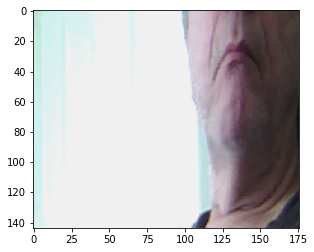

In [12]:
# Reformat the bytes into an image
raw_bytes = np.array(HEXADECIMAL_BYTES, dtype="i2")
image = np.zeros((len(raw_bytes),3), dtype=int)

# Loop through all of the pixels and form the image
for i in range(len(raw_bytes)):
    #Read 16-bit pixel
    pixel = struct.unpack('>h', raw_bytes[i])[0]

    #Convert RGB565 to RGB 24-bit
    r = ((pixel >> 11) & 0x1f) << 3;
    g = ((pixel >> 5) & 0x3f) << 2;
    b = ((pixel >> 0) & 0x1f) << 3;
    image[i] = [r,g,b]

image = np.reshape(image,(144, 176,3)) #QCIF resolution

# Show the image
plt.imshow(image)
plt.show()